In [33]:
import pandas as pd
import glob

# 定义包含所有Excel文件的文件夹路径
folder_path = 'D:\\jupyter notebook\\家庭研究\\aoi'  # 请替换为实际文件夹路径
files = glob.glob(f"{folder_path}/*.xlsx")  # 获取所有.xlsx文件
print(f"Found {len(files)} files in the folder.")  # Debugging line
df_list = []

# 读取所有文件，移除重复项，并添加到df_list列表中
for file in files:
    df = pd.read_excel(file)
    df_no_duplicates = df.drop_duplicates(subset='name', keep='first')  # 假设公园名称的列名为'name'
    df_list.append(df_no_duplicates)

# 合并所有DataFrame
df_park_areas_combined = pd.concat(df_list).drop_duplicates(subset='name', keep='first')

# 设置公园名称为索引
df_park_areas_combined.set_index('name', inplace=True)

# 读取主DataFrame
# df_parks = pd.read_excel('娱乐公园游玩.xlsx')  # 确保主DataFrame也在这个文件夹里
df_parks = pd.read_csv('游玩点_更新.csv', encoding='gbk')  # 确保主DataFrame也在这个文件夹里

# 使用映射更新面积信息，假设附近POI列为'附近POI'，公园面积列为'park_area(m2)'
df_parks['实际游玩点面积'] = df_parks['附近POI'].map(df_park_areas_combined['park_area(m2)'])
df_parks['理想游玩点面积'] = df_parks['最近POI'].map(df_park_areas_combined['park_area(m2)'])
# 查看更新后的DataFrame
print(df_parks)

# 如果需要，可以将更新后的DataFrame保存回Excel文件
df_parks.to_excel("D:\house_mix_EM\分析数据\游玩点.xlsx", index=False)


Found 13 files in the folder.
      member_id   latitude   longitude  point_order purpose  \
0            15  22.392793  113.337241            1  娱乐公园游玩   
1           227  22.380094  113.320139            1  娱乐公园游玩   
2           356  22.381243  113.347683            3  娱乐公园游玩   
3           470  22.468069  113.284072            3  娱乐公园游玩   
4           476  22.468087  113.283951            1  娱乐公园游玩   
...         ...        ...         ...          ...     ...   
1109      39889  22.679718  113.228046            1  娱乐公园游玩   
1110      39890  22.679718  113.228046            1  娱乐公园游玩   
1111      39971  22.630837  113.188249            1  娱乐公园游玩   
1112      39977  22.625883  113.194536            2  娱乐公园游玩   
1113      39978  22.625883  113.194536            2  娱乐公园游玩   

                       附近POI                           POI地址  POI距离  \
0                     融创溪湾首府             中山市板芙中路与工业大道交叉路口西南侧    127   
1                      义发家具厂                     广东省中山市校墩街4号     20   


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设df是你的DataFrame，且它已经被正确加载
# df = pd.read_excel("D:\jupyter notebook\家庭研究\aoi\娱乐公园游玩_更新.xlsx")

# 删除完全相同的行，只保留唯一的访问记录
df_unique_visits = df.drop_duplicates(subset=['member_id', '附近POI'])

# 计算每个POI的唯一访问次数
poi_visits = df_unique_visits.groupby('附近POI')['member_id'].nunique()

# 计算每个POI的平均面积
poi_area = df_unique_visits.groupby('附近POI')['面积'].mean()

# 合并两个序列成为DataFrame
analysis_df = pd.concat([poi_visits, poi_area], axis=1)
analysis_df.columns = ['唯一访问次数', '平均面积']

# 现在我们有了每个POI的唯一访问次数和平均面积，我们可以通过散点图来分析它们之间的关系
plt.scatter(analysis_df['平均面积'], analysis_df['唯一访问次数'])

# 添加图表标签和标题
plt.xlabel('平均面积 (平方米)')
plt.ylabel('唯一访问次数')
plt.title('休闲场地面积对老年人吸引力的影响')

# 显示图表
plt.show()

# 如果你想要进一步的统计分析，你可以使用Pearson相关系数来评估面积和唯一访问次数之间的相关性
correlation = analysis_df['平均面积'].corr(analysis_df['唯一访问次数'])
print(f'面积和唯一访问次数的Pearson相关系数为: {correlation:.2f}')


面积和唯一访问次数的Pearson相关系数为: 0.32


# 第一步：家的点坐标处理获得

In [23]:
import pandas as pd

# 假设您的数据已经保存在CSV文件中
file_path = "D:\jupyter notebook\家庭研究\encoded_data.csv"  # 请替换为您文件的实际路径

# 读取数据
df = pd.read_csv(file_path)

# 创建一个新列来存储家的经纬度
df['家的经纬度'] = None

# 定义一个函数来从轨迹中提取家的经纬度
def get_home_coordinates(row):
    # 获取轨迹列表和出行目的列表
    traj_list = eval(row['轨迹'])
    purposes_list = eval(row['出行目的'])
    
    # 轨迹列表的第一个点是没有出行目的的，所以我们从第二个点开始搜索
    # 寻找与“回家”目的对应的轨迹点
    home_coords = None
    if '回家' in purposes_list:
        home_index = purposes_list.index('回家') + 1  # 加1是因为出行目的是从轨迹的第二个点开始对应的
        home_coords = traj_list[home_index]

    return home_coords

# 应用函数到每一行
df['家的经纬度'] = df.apply(get_home_coordinates, axis=1)

# 输出看一下家的经纬度是否正确提取
print(df[['成员编号', '家的经纬度']])

# 您可以选择导出这个数据帧到一个新的CSV文件
df.to_csv('更新后的encoded_data.csv', encoding='gbk', index=False)


       成员编号                                     家的经纬度
0        15         (113.33747050000001, 22.39438387)
1        28                (113.3341781, 22.39763988)
2        39                (113.3342884, 22.39727714)
3        47         (113.33541809999998, 22.39544098)
4        48         (113.33541809999998, 22.39544098)
...     ...                                       ...
4178  39962                 (113.190744, 22.63025993)
4179  39963                 (113.190744, 22.63025993)
4180  39971         (113.19235149999999, 22.63171327)
4181  39977  (113.18816129999999, 22.629551199999998)
4182  39978  (113.18816129999999, 22.629551199999998)

[4183 rows x 2 columns]


# 为轨迹坐标.csv确定家的经纬度

In [33]:
import pandas as pd

# 加载两个数据文件
encoded_data_path = "D:\\jupyter notebook\\家庭研究\\更新后的encoded_data.csv"
other_data_path = "轨迹坐标.csv"  # 请替换为您文件的实际路径

# 读取数据
encoded_df = pd.read_csv(encoded_data_path)
other_df = pd.read_csv(other_data_path, encoding='gbk')

# 在encoded_df中创建一个成员编号到家的经纬度的映射
home_coordinates_map = encoded_df.set_index('成员编号')['家的经纬度'].to_dict()

# 定义一个函数来根据member_id获取家的经纬度
def get_home_coordinates_by_member_id(member_id):
    # 如果成员编号在映射中，返回家的经纬度，否则返回None
    return home_coordinates_map.get(member_id)

# 在other_df中添加一个新列来存储家的经纬度
other_df['家的经纬度'] = other_df['member_id'].apply(get_home_coordinates_by_member_id)

# 输出看一下家的经纬度是否正确添加
print(other_df[['member_id', '家的经纬度']])

# 您可以选择导出这个数据帧到一个新的CSV文件
other_df.to_csv('更新后的轨迹坐标.csv', encoding='gbk', index=False)


       member_id                                     家的经纬度
0             15         (113.33747050000001, 22.39438387)
1             15         (113.33747050000001, 22.39438387)
2             15         (113.33747050000001, 22.39438387)
3             28                (113.3341781, 22.39763988)
4             28                (113.3341781, 22.39763988)
...          ...                                       ...
16285      39977  (113.18816129999999, 22.629551199999998)
16286      39978  (113.18816129999999, 22.629551199999998)
16287      39978  (113.18816129999999, 22.629551199999998)
16288      39978  (113.18816129999999, 22.629551199999998)
16289      39978  (113.18816129999999, 22.629551199999998)

[16290 rows x 2 columns]


# 因为更新后的轨迹坐标.csv数据有的并没有家的坐标，所以需要补足。

In [26]:
# Load the new datasets
trail_data_path = '更新后的轨迹坐标.csv'
individual_data_path = 'D:\house_mix_EM\中山居民出行调查数据（个人信息）.xlsx'
# travel_data_path = 'D:\house_mix_EM\中山居民出行调查数据（出行信息）.xlsx'
family_data_path = 'D:\house_mix_EM\中山居民出行调查数据（家庭信息）.xlsx'

trail_data = pd.read_csv(trail_data_path, encoding='gbk')
individual_data = pd.read_excel(individual_data_path)
# travel_data = pd.read_excel(travel_data_path)
family_data = pd.read_excel(family_data_path)

# Display the first few rows of each dataframe to understand their structure
trail_data_head = trail_data.head()
individual_data_head = individual_data.head()
# travel_data_head = travel_data.head()
family_data_head = family_data.head()

# (trail_data_head, individual_data_head, travel_data_head, family_data_head)
(trail_data_head, individual_data_head, family_data_head)

(   member_id   latitude   longitude  point_order purpose   附近POI  \
 0         15  22.394384  113.337470            0     NaN   101公馆   
 1         15  22.392793  113.337241            1  娱乐公园游玩  融创溪湾首府   
 2         15  22.394384  113.337470            2      回家   101公馆   
 3         28  22.397640  113.334178            0     NaN    白溪车站   
 4         28  22.396582  113.332595            1    购物逛街  白溪农贸市场   
 
                  POI地址  POI距离        家的经度       家的纬度  
 0  广东省中山市板芙镇白溪村白泥坑1街3号   39.0  113.337470  22.394384  
 1  中山市板芙中路与工业大道交叉路口西南侧  127.0  113.337470  22.394384  
 2  广东省中山市板芙镇白溪村白泥坑1街3号   39.0  113.337470  22.394384  
 3        广东省中山市板芙中路72号  216.0  113.334178  22.397640  
 4        广东省中山市板芙中路15号    0.0  113.334178  22.397640  ,
    个人编号  家庭编号  工作地(学校)地址经度(WGS84)  工作地(学校)地址纬度(WGS84) 工作地交通小区编码 用地性质 性别  年龄  \
 0     1     1          113.344705           22.392017      1127   商业  男  35   
 1     2     1          113.331521           22.394539      1130   商业  女  32   
 2     

In [27]:
# Merge the two dataframes on 'member_id' from park_data and '成员编号' from family_data
merged_data = pd.merge(individual_data, family_data, left_on='家庭编号', right_on='家庭编号', how='left')

# Display the first few rows of the merged dataframe
# merged_data_head = merged_data.head()
# merged_data_head
merged_data

个人编号   家庭编号  工作地(学校)地址经度(WGS84)  工作地(学校)地址纬度(WGS84) 工作地交通小区编码 用地性质 性别  \
0          1      1          113.344705           22.392017      1127   商业  男   
1          2      1          113.331521           22.394539      1130   商业  女   
2          3      2          113.331010           22.392885      1133   商业  男   
3          4      2          113.344705           22.392017      1127   商业  女   
4          5      3          113.348119           22.393304      1127   商业  男   
...      ...    ...                 ...                 ...       ...  ... ..   
39975  39976  15239          113.190506           22.631728       337   学校  男   
39976  39977  15240          113.188161           22.629551       357   居住  男   
39977  39978  15240          113.188161           22.629551       357   居住  女   
39978  39979  15240          113.171334           22.632498       344   工业  男   
39979  39980  15240          113.194536           22.625883       365   学校  男   

       年龄       户籍情况                职业  ... 不满六周岁人数 户籍人口数 非户籍人口数  家庭年均总收入  \
0      35      外省市户籍  生产、运输设备操作人员及有关人员  ...       1     0      3   5～10万元   
1      32      外省市户籍  生产、运输设备操作人员及有关人员  ...       1     0      3   5～10万元   
2      28      外省市户籍    企业（公司）行政办公业务人员  ...       0     0      2   5～10万元   
3      27      外省市户籍    企业（公司）行政办公业务人员  ...       0     0      2   5～10万元   
4      38  广东省其它地市户籍  生产、运输设备操作人员及有关人员  ...       0     0      3   5～10万元   
...    ..        ...               ...  ...     ...   ...    ...      ...   
39975   9  广东省其它地市户籍              中小学生  ...       1     4      0   5～10万元   
39976  60  广东省其它地市户籍             离退休人员  ...       1     0      5  10～20万元   
39977  58  广东省其它地市户籍             离退休人员  ...       1     0      5  10～20万元   
39978  36  广东省其它地市户籍  生产、运输设备操作人员及有关人员  ...       1     0      5  10～20万元   
39979  13  广东省其它地市户籍              中小学生  ...       1     0      5  10～20万元   

         住房性质  小汽车  摩托车  电动车  自行车  其他  
0      租(借)住房    0    0    1    1   0  
1      租(借)住房    0    0    1    1   0  
2      租(借)住房    0    0    1    0   0  
3      租(借)住房    0    0    1    0   0  
4        自有住房    0    1    1    0   0  
...       ...  ...  ...  ...  ...  ..  
39975  租(借)住房    0    1    1    0   0  
39976  租(借)住房    1    1    1    1   0  
39977  租(借)住房    1    1    1    1   0  
39978  租(借)住房    1    1    1    1   0  
39979  租(借)住房    1    1    1    1   0  

[39980 rows x 29 columns]

In [28]:
merged_data_trail = pd.merge(trail_data, merged_data, left_on='member_id', right_on='个人编号', how='left')
merged_data_trail

member_id   latitude   longitude  point_order purpose         附近POI  \
0             15  22.394384  113.337470            0     NaN         101公馆   
1             15  22.392793  113.337241            1  娱乐公园游玩        融创溪湾首府   
2             15  22.394384  113.337470            2      回家         101公馆   
3             28  22.397640  113.334178            0     NaN          白溪车站   
4             28  22.396582  113.332595            1    购物逛街        白溪农贸市场   
...          ...        ...         ...          ...     ...           ...   
16285      39977  22.629551  113.188161            3      回家          金辉铝业   
16286      39978  22.629551  113.188161            0     NaN          金辉铝业   
16287      39978  22.630966  113.195377            1    外出就餐  好又多生活超市(曹步店)   
16288      39978  22.625883  113.194536            2  娱乐公园游玩     中山市曹步初级中学   
16289      39978  22.629551  113.188161            3      回家          金辉铝业   

                     POI地址  POI距离        家的经度       家的纬度  ...  不满六周岁人数  户籍人口数  \
0      广东省中山市板芙镇白溪村白泥坑1街3号   39.0  113.337470  22.394384  ...        2      0   
1      中山市板芙中路与工业大道交叉路口西南侧  127.0  113.337470  22.394384  ...        2      0   
2      广东省中山市板芙镇白溪村白泥坑1街3号   39.0  113.337470  22.394384  ...        2      0   
3            广东省中山市板芙中路72号  216.0  113.334178  22.397640  ...        0      0   
4            广东省中山市板芙中路15号    0.0  113.334178  22.397640  ...        0      0   
...                    ...    ...         ...        ...  ...      ...    ...   
16285        广东省中山市乐昌西路18号   24.0  113.188161  22.629551  ...        1      0   
16286        广东省中山市乐昌西路18号   24.0  113.188161  22.629551  ...        1      0   
16287        广东省中山市曹兴中路71号   50.0  113.188161  22.629551  ...        1      0   
16288        广东省中山市西安上街36号    0.0  113.188161  22.629551  ...        1      0   
16289        广东省中山市乐昌西路18号   24.0  113.188161  22.629551  ...        1      0   

       非户籍人口数  家庭年均总收入    住房性质 小汽车 摩托车  电动车 自行车 其他  
0           5   5～10万元  租(借)住房   0   1    1   0  0  
1           5   5～10万元  租(借)住房   0   1    1   0  0  
2           5   5～10万元  租(借)住房   0   1    1   0  0  
3           3   5～10万元  租(借)住房   0   1    1   0  0  
4           3   5～10万元  租(借)住房   0   1    1   0  0  
...       ...      ...     ...  ..  ..  ...  .. ..  
16285       5  10～20万元  租(借)住房   1   1    1   1  0  
16286       5  10～20万元  租(借)住房   1   1    1   1  0  
16287       5  10～20万元  租(借)住房   1   1    1   1  0  
16288       5  10～20万元  租(借)住房   1   1    1   1  0  
16289       5  10～20万元  租(借)住房   1   1    1   1  0  

[16290 rows x 39 columns]

In [29]:
merged_data_trail.to_csv('更新后的轨迹坐标.csv', encoding='gbk', index=False)

# 计算每个点和家的距离

In [30]:
import pandas as pd
from math import radians, cos, sin, asin, sqrt

# CSV文件路径
file_path = r"D:\jupyter notebook\家庭研究\更新后的轨迹坐标.csv"

# 读取CSV文件
df = pd.read_csv(file_path, encoding='gbk')

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in meters between two points
    on the earth (specified in decimal degrees).
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371000  # Radius of earth in meters
    return c * r

# 计算距离并将结果存储在新列中
df['距离家的距离（米）'] = df.apply(
    lambda row: haversine(row['longitude'], row['latitude'], row['家的经度'], row['家的纬度']), axis=1
)

# 打印结果
print(df[['member_id', 'latitude', 'longitude', '家的经度', '家的纬度', '距离家的距离（米）']])

# 如果需要将结果保存回CSV文件：
df.to_csv(r"D:\jupyter notebook\家庭研究\更新后的轨迹坐标_带距离.csv", encoding='gbk', index=False)


       member_id   latitude   longitude        家的经度       家的纬度   距离家的距离（米）
0             15  22.394384  113.337470  113.337470  22.394384    0.000000
1             15  22.392793  113.337241  113.337470  22.394384  178.414028
2             15  22.394384  113.337470  113.337470  22.394384    0.000000
3             28  22.397640  113.334178  113.334178  22.397640    0.000000
4             28  22.396582  113.332595  113.334178  22.397640  200.817126
...          ...        ...         ...         ...        ...         ...
16285      39977  22.629551  113.188161  113.188161  22.629551    0.000000
16286      39978  22.629551  113.188161  113.188161  22.629551    0.000000
16287      39978  22.630966  113.195377  113.188161  22.629551  757.069807
16288      39978  22.625883  113.194536  113.188161  22.629551  770.986460
16289      39978  22.629551  113.188161  113.188161  22.629551    0.000000

[16290 rows x 6 columns]


# 计算最近游玩点距离

In [31]:
import pandas as pd
import numpy as np

# 定义haversine函数
def haversine(lon1, lat1, lon2, lat2):
    # 将十进制度数转换为弧度
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # haversine公式
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # 地球平均半径, 单位公里
    return km * 1000  # 结果转换为米

# 读取CSV文件
df = pd.read_csv('游玩点.csv')

# 初始化列，用于保存最近游玩点的距离和信息
df['最近POI'] = None
df['最近POI地址'] = None
df['最近POI距离'] = None
df['到最近游玩点的距离（米）'] = None

# 遍历每一行数据
for index, row in df.iterrows():
    # 检查家的经度和纬度是否不为空
    if pd.notnull(row['家的经度']) and pd.notnull(row['家的纬度']):
        min_distance = float('inf')
        closest_poi = None
        closest_poi_address = None
        closest_poi_distance = None

        # 遍历每一行数据以查找最近的游玩点
        for _, poi in df.iterrows():
            distance = haversine(row['家的经度'], row['家的纬度'], poi['longitude'], poi['latitude'])
            if distance < min_distance:
                min_distance = distance
                closest_poi = poi['附近POI']
                closest_poi_address = poi['POI地址']
                closest_poi_distance = poi['POI距离']
        
        # 更新行信息
        df.at[index, '最近POI'] = closest_poi
        df.at[index, '最近POI地址'] = closest_poi_address
        df.at[index, '最近POI距离'] = closest_poi_distance
        df.at[index, '到最近游玩点的距离（米）'] = min_distance

# 最后，保存到一个新的CSV文件
df.to_csv('游玩点_更新.csv', encoding='gbk', index=False)


# 查看每个家和所到游玩点

In [11]:
import folium
import pandas as pd

# 加载数据
df = pd.read_csv('更新后的轨迹坐标_带距离.csv')

# 创建一个地图对象
# 这里使用了数据集中的第一个经纬度作为地图中心点
m = folium.Map(location=[df.iloc[0]['家的纬度'], df.iloc[0]['家的经度']], zoom_start=12)

# 初始化一个字典来保存每个家庭的位置
homes = {}

# 对于数据集中的每一行
for index, row in df.iterrows():
    # 如果家的坐标存在，则添加到homes字典
    if not pd.isna(row['家的纬度']) and not pd.isna(row['家的经度']):
        homes[row['member_id']] = [row['家的纬度'], row['家的经度']]

    # 如果目的是娱乐公园游玩，添加蓝色的标记
    if row['purpose'] == '娱乐公园游玩':
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=row['附近POI']
        ).add_to(m)

        # 如果该会员的家的位置已经记录，则用线连接家和游玩点
        if row['member_id'] in homes:
            home_location = homes[row['member_id']]
            folium.PolyLine([home_location, [row['latitude'], row['longitude']]], color='green').add_to(m)

# 为每个家添加红色的标记
for member_id, location in homes.items():
    folium.CircleMarker(
        location=location,
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup='家'
    ).add_to(m)
        
        
m   

In [19]:
# 中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

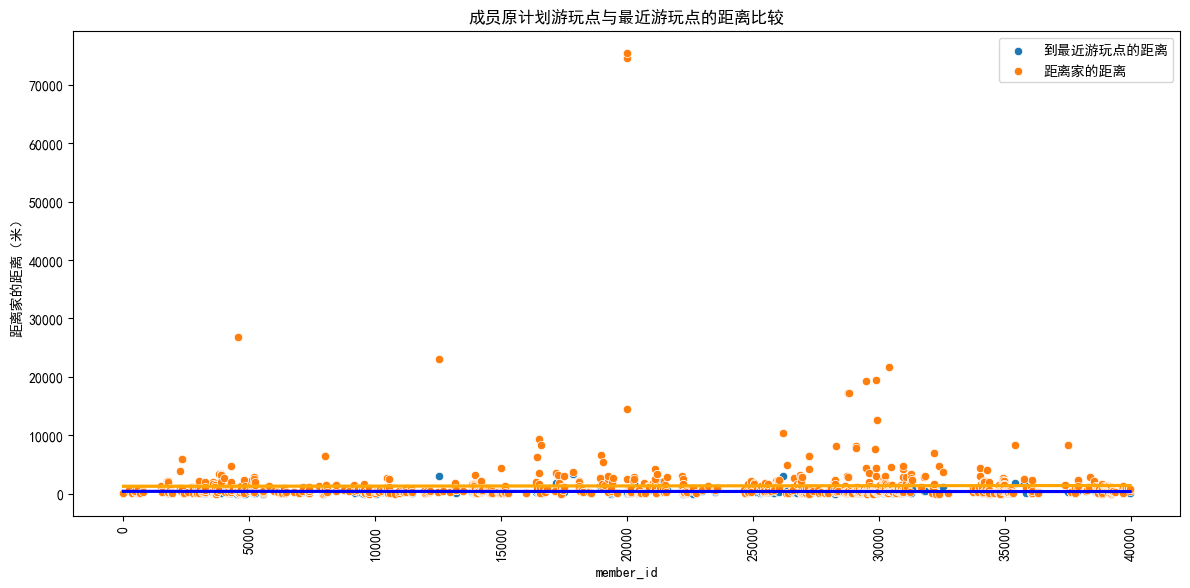

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你的数据已经保存为CSV格式，并且你已经将其读取到一个DataFrame
df = pd.read_csv('游玩点_更新.csv')


# 散点图显示原计划游玩点与最近游玩点的距离
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='member_id', y='到最近游玩点的距离（米）', label='到最近游玩点的距离')
sns.scatterplot(data=df, x='member_id', y='距离家的距离（米）', label='距离家的距离')
plt.xticks(rotation=90)
plt.xlabel('成员ID')
plt.ylabel('距离（米）')
plt.title('成员原计划游玩点与最近游玩点的距离比较')
plt.legend()
plt.tight_layout()

# 添加一条趋势线（可选）
sns.regplot(data=df, x='member_id', y='到最近游玩点的距离（米）', scatter=False, color='blue')
sns.regplot(data=df, x='member_id', y='距离家的距离（米）', scatter=False, color='orange')

plt.show()

# 标准化后计算相关性并分类出公园

C:\Users\Ng_HC\AppData\Local\Temp\ipykernel_26248\1710773628.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['游玩点面积差'] = filtered_data['实际游玩点面积'] - filtered_data['理想游玩点面积']
C:\Users\Ng_HC\AppData\Local\Temp\ipykernel_26248\1710773628.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['距离差'] = filtered_data['距离家的距离（米）'] - filtered_data['到最近游玩点的距离（米）']


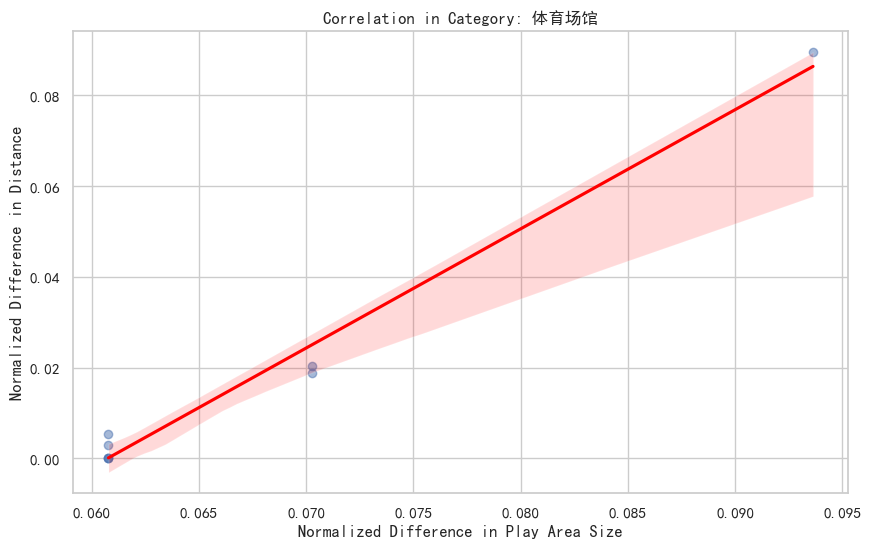

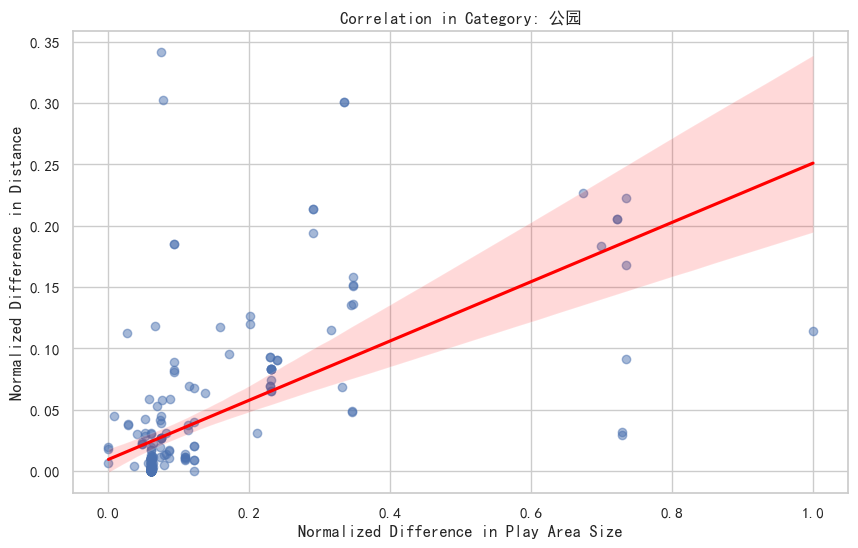

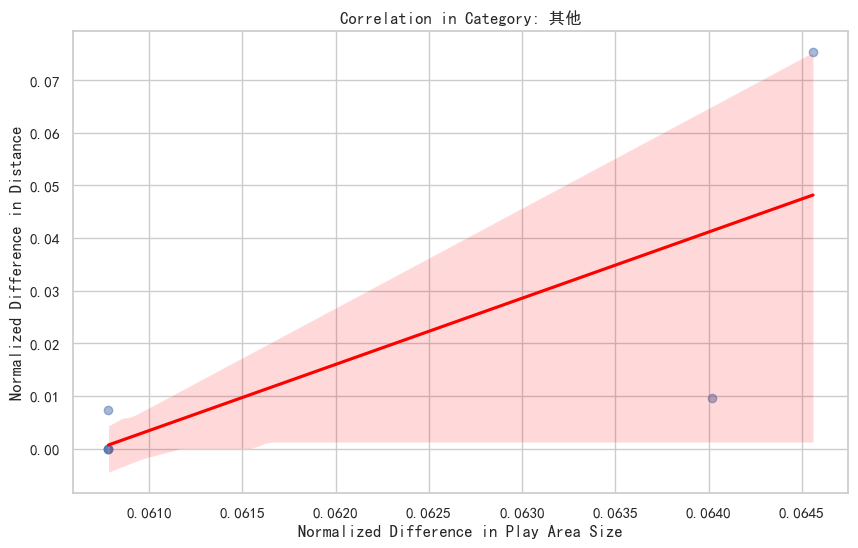

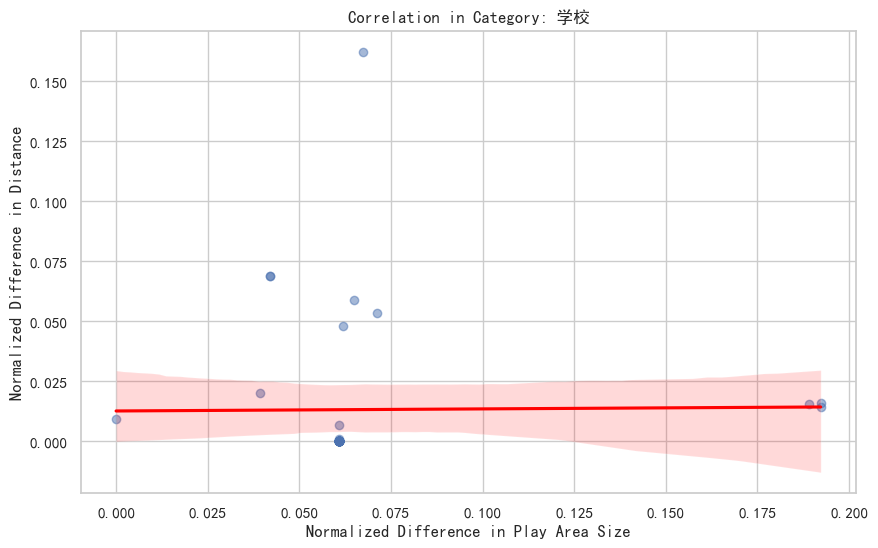

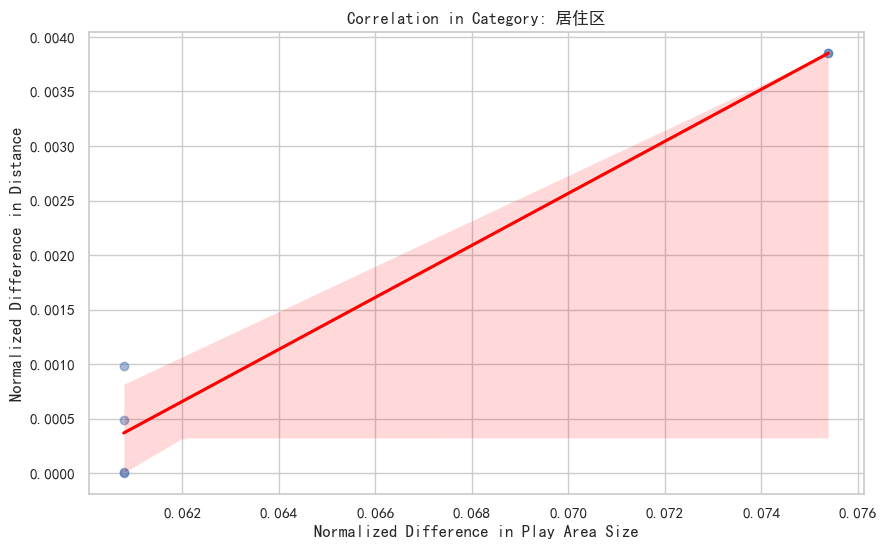

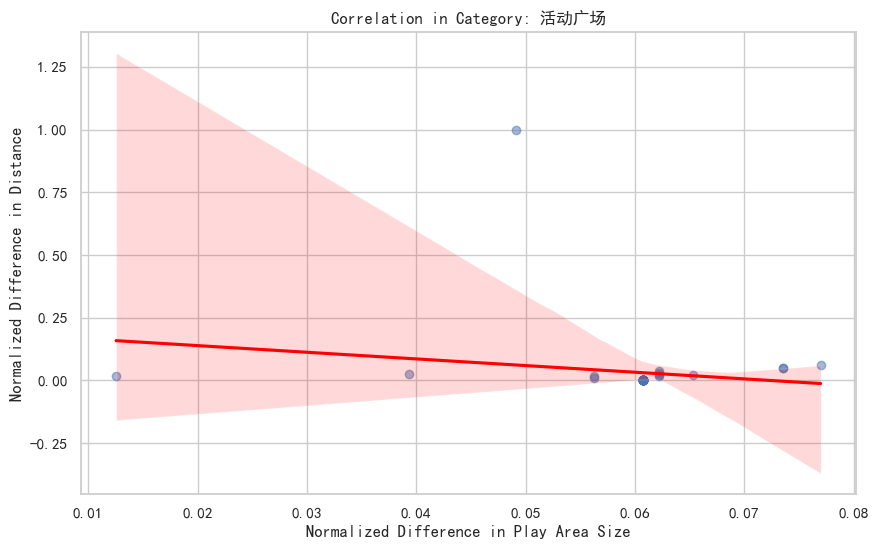

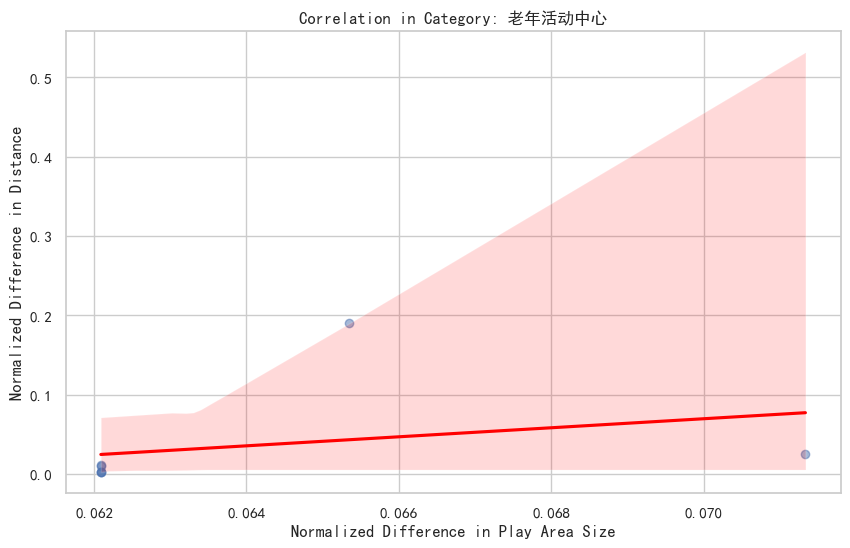

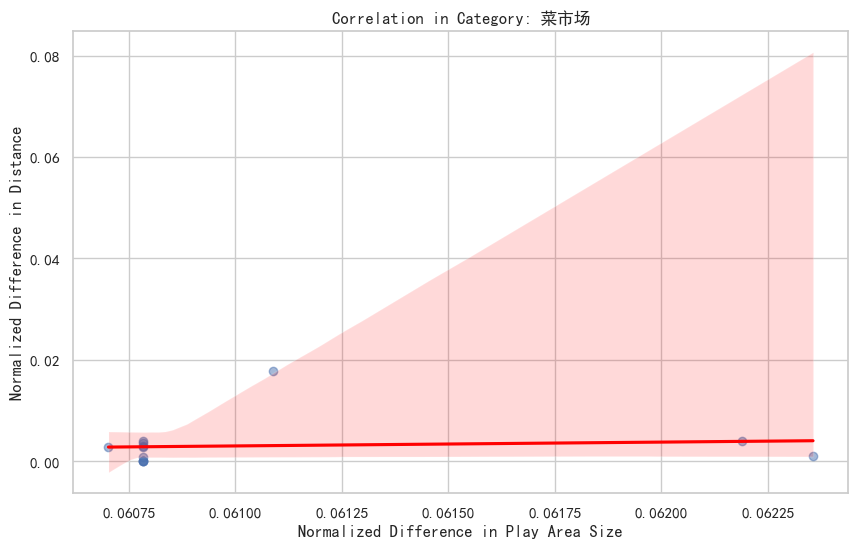

{'体育场馆': (0.991873394744224, 1.333572793943392e-06),
 '公园': (0.5949295613722697, 7.063229212197496e-22),
 '其他': (0.7708997884180727, 0.07271797967691983),
 '学校': (0.010224876587961094, 0.949409744391744),
 '居住区': (0.9803341471214182, 0.0005763158114614058),
 '活动广场': (-0.1606400353607035, 0.309501971683443),
 '老年活动中心': (0.2895584025228553, 0.5287761604293927),
 '菜市场': (0.08979129045790583, 0.7705044384131521)}

In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data from the uploaded CSV file
file_path = 'D:\jupyter notebook\家庭研究\游玩点_更新3.xlsx'
data = pd.read_excel(file_path)

# Displaying the first few rows of the dataframe to understand its structure
# data.head()

# Filtering the data based on the given conditions
filtered_data = data[(data['POI距离'] == 0) & data['实际游玩点面积'].notna() & data['理想游玩点面积'].notna()]


# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Selecting the columns for normalization
columns_to_normalize = ['游玩点面积差', '距离差']

# Calculating the differences
# Setting a tolerance level for considering values as zero
tolerance = 0  # This can be adjusted based on the precision required

# Applying the tolerance level to the calculation of differences
filtered_data['游玩点面积差'] = filtered_data['实际游玩点面积'] - filtered_data['理想游玩点面积']
filtered_data['距离差'] = filtered_data['距离家的距离（米）'] - filtered_data['到最近游玩点的距离（米）']

# Excluding cases where both differences are effectively zero, considering the tolerance
refined_data_with_tolerance = filtered_data[
    ~(
#         (abs(filtered_data['游玩点面积差']) != 0) & 
#         (abs(filtered_data['距离差']) < tolerance)
        (abs(filtered_data['游玩点面积差']) == tolerance)
    )
]

# Fitting the scaler to the data and transforming it
normalized_data = refined_data_with_tolerance.copy()
normalized_data[columns_to_normalize] = scaler.fit_transform(refined_data_with_tolerance[columns_to_normalize])

# Assuming normalized_data contains sufficient data points
# Calculating the Pearson correlation coefficient and the p-value
grouped_data = normalized_data.groupby('分类')

# Initializing a dictionary to store correlation results for each category
category_correlations = {}

# Looping through each group to perform correlation analysis
for category, group in grouped_data:
    if len(group) >= 2:  # Ensuring there are at least two data points in the group
        correlation_coefficient, p_value = pearsonr(group['游玩点面积差'], group['距离差'])
        category_correlations[category] = (correlation_coefficient, p_value)
    else:
        category_correlations[category] = (None, None)  # Insufficient data in this category




# Setting the style
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# Creating scatter plots for each category
for category, group in grouped_data:
    if len(group) >= 2:
        plt.figure(figsize=(10, 6))
        sns.regplot(x='游玩点面积差', y='距离差', data=group, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
        # Adding labels and title
        plt.xlabel('Normalized Difference in Play Area Size')
        plt.ylabel('Normalized Difference in Distance')
        plt.title(f'Correlation in Category: {category}')
        plt.show()
        
category_correlations

# 不标准化计算相关性+最近游玩点也是公园的数据处理

C:\Users\Ng_HC\AppData\Local\Temp\ipykernel_26248\4046462170.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['游玩点面积差'] = filtered_data['实际游玩点面积'] - filtered_data['理想游玩点面积']
C:\Users\Ng_HC\AppData\Local\Temp\ipykernel_26248\4046462170.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['距离差'] = filtered_data['距离家的距离（米）'] - filtered_data['到最近游玩点的距离（米）']


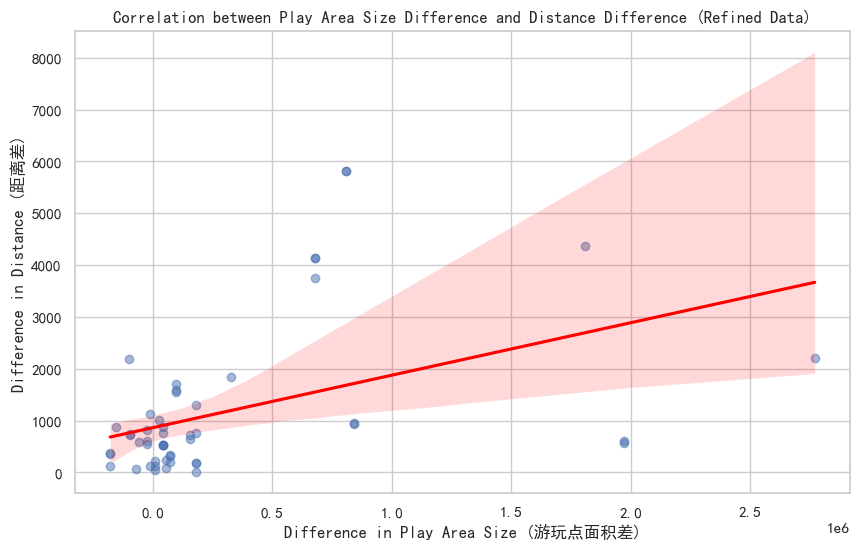

0.43692202426505583

In [48]:
import pandas as pd

# Loading the data from the uploaded CSV file
file_path = 'D:\house_mix_EM\modified_公园分类数据.csv'
data = pd.read_csv(file_path, encoding='gbk')

# Displaying the first few rows of the dataframe to understand its structure
data.head()

# Filtering the data based on the given conditions
# filtered_data = data[(data['POI距离'] == 0) & data['实际游玩点面积'].notna() & data['理想游玩点面积'].notna()]
filtered_data = data[data['理想分类'].notna() & (data['判断是否是同一个公园'] == '不同') & data['实际游玩点面积'].notna() & data['理想游玩点面积'].notna()]
# Calculating the differences
# Setting a tolerance level for considering values as zero
tolerance = 0  # This can be adjusted based on the precision required

# Applying the tolerance level to the calculation of differences
filtered_data['游玩点面积差'] = filtered_data['实际游玩点面积'] - filtered_data['理想游玩点面积']
filtered_data['距离差'] = filtered_data['距离家的距离（米）'] - filtered_data['到最近游玩点的距离（米）']

# Excluding cases where both differences are effectively zero, considering the tolerance
refined_data_with_tolerance = filtered_data[
    ~(
#         (abs(filtered_data['游玩点面积差']) < tolerance) & 
#         (abs(filtered_data['距离差']) < tolerance)
        (abs(filtered_data['距离差']) < tolerance)
    )
]

# Performing correlation analysis on the refined data
refined_correlation_with_tolerance = refined_data_with_tolerance['游玩点面积差'].corr(refined_data_with_tolerance['距离差'])



import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# Recreating the scatter plot with the refined data
plt.figure(figsize=(10, 6))
sns.regplot(x='游玩点面积差', y='距离差', data=refined_data_with_tolerance, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})

# Adding labels and title
plt.xlabel('Difference in Play Area Size (游玩点面积差)')
plt.ylabel('Difference in Distance (距离差)')
plt.title('Correlation between Play Area Size Difference and Distance Difference (Refined Data)')

# Displaying the plot
plt.show()

refined_correlation_with_tolerance

In [46]:
filtered_data

member_id  latitude  longitude  point_order purpose     附近POI  \
11        2724  22.51136   113.4039            1  娱乐公园游玩     紫马岭公园   
12        2725  22.51099   113.4044            1  娱乐公园游玩     紫马岭公园   
90       10471  22.65716   113.1939            1  娱乐公园游玩     南方绿博园   
106      16429  22.51094   113.4055            1  娱乐公园游玩     紫马岭公园   
107      16430  22.51093   113.4055            1  娱乐公园游玩     紫马岭公园   
110      17171  22.54002   113.4772            3  娱乐公园游玩     华佗山公园   
111      17285  22.54867   113.4547            1  娱乐公园游玩     张家边公园   
139      20836  22.49223   113.3640            1  娱乐公园游玩    中山市树木园   
141      20845  22.49223   113.3640            1  娱乐公园游玩    中山市树木园   
213      29094  22.55541   113.3839            1  娱乐公园游玩    大信体育公园   
215      29119  22.55550   113.3836            1  娱乐公园游玩    大信体育公园   
226      29367  22.53943   113.3842            1  娱乐公园游玩    石岐文化公园   
250      29529  22.53219   113.3675            4  娱乐公园游玩     中山漫画馆   
251      29536  22.53219   113.3675            5  娱乐公园游玩     中山漫画馆   
252      29545  22.53219   113.3675            1  娱乐公园游玩     中山漫画馆   
256      29558  22.53219   113.3675            1  娱乐公园游玩     中山漫画馆   
257      29610  22.53220   113.3675            4  娱乐公园游玩     中山漫画馆   
259      29642  22.53220   113.3675            2  娱乐公园游玩     中山漫画馆   
262      29677  22.53831   113.3841            4  娱乐公园游玩    石岐文化公园   
264      29699  22.53831   113.3841            4  娱乐公园游玩    石岐文化公园   
268      29754  22.53831   113.3841            3  娱乐公园游玩    石岐文化公园   
284      29879  22.51116   113.4060            1  娱乐公园游玩     紫马岭公园   
285      29880  22.51116   113.4060            1  娱乐公园游玩     紫马岭公园   
307      30033  22.53007   113.3683            1  娱乐公园游玩     逸仙湖公园   
328      30443  22.53184   113.3661            1  娱乐公园游玩     逸仙湖公园   
329      30443  22.53184   113.3661            5  娱乐公园游玩     逸仙湖公园   
332      30455  22.53184   113.3661            3  娱乐公园游玩     逸仙湖公园   
334      30459  22.52488   113.3704            2  娱乐公园游玩  孙中山纪念堂公园   
346      30661  22.52141   113.3768            1  娱乐公园游玩       华柏园   
348      30727  22.52630   113.3644            1  娱乐公园游玩      中山公园   
349      30728  22.53220   113.3675            2  娱乐公园游玩     中山漫画馆   
350      30729  22.52535   113.3703            5  娱乐公园游玩  孙中山纪念堂公园   
352      30752  22.52616   113.3645            1  娱乐公园游玩      中山公园   
353      30759  22.53184   113.3661            1  娱乐公园游玩     逸仙湖公园   
354      30840  22.53220   113.3675            1  娱乐公园游玩     中山漫画馆   
355      30844  22.53220   113.3675            3  娱乐公园游玩     中山漫画馆   
363      30902  22.53187   113.3677            1  娱乐公园游玩     逸仙湖公园   
364      30907  22.52610   113.3653            1  娱乐公园游玩      中山公园   
369      30946  22.51483   113.4003            1  娱乐公园游玩     紫马岭公园   
370      30949  22.49290   113.3648            1  娱乐公园游玩    中山市树木园   
374      30972  22.53184   113.3661            4  娱乐公园游玩     逸仙湖公园   
394      34156  22.54248   113.3510            1  娱乐公园游玩    彩虹绿洲公园   
395      34160  22.54248   113.3510            1  娱乐公园游玩    彩虹绿洲公园   
396      34164  22.54248   113.3510            1  娱乐公园游玩    彩虹绿洲公园   
475      39667  22.67935   113.2277            3  娱乐公园游玩      凤山公园   
476      39670  22.67887   113.2274            3  娱乐公园游玩      凤山公园   
479      39690  22.67400   113.2174            1  娱乐公园游玩    永宁中心公园   
480      39795  22.67971   113.2280            1  娱乐公园游玩      凤山公园   
481      39811  22.67971   113.2280            1  娱乐公园游玩      凤山公园   
482      39889  22.67972   113.2280            1  娱乐公园游玩      凤山公园   
483      39890  22.67972   113.2280            1  娱乐公园游玩      凤山公园   

                      POI地址  POI距离      家的经度      家的纬度  ...  最近POI距离  \
11      广东省中山市东区街道新鳌岭社区博爱六路      0  113.3942  22.50574  ...      0.0   
12      广东省中山市东区街道新鳌岭社区博爱六路      0  113.3941  22.50569  ...      0.0   
90          中山市古镇海洲东岸北路396号      0  113.1699  22.66590  ...      0.0   
106     广东省中山市东区街道新鳌岭社区博爱六路      0  113.4510  22.54778  ...      0.0   
107 

# 实际游玩点距离家的距离与到最近游玩点的距离之差在不同目的地分类中是否存在差别

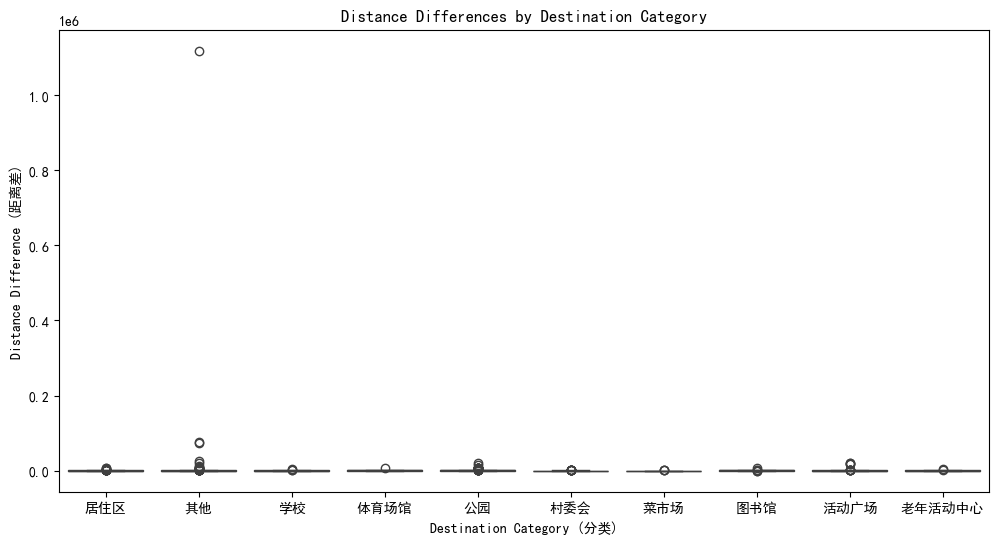

F_onewayResult(statistic=3.763395218738516, pvalue=0.002240001520677371)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
# Loading the data from the uploaded CSV file
data_path = 'D:\house_mix_EM\分析数据\游玩点_使用表.xlsx'
data = pd.read_excel(data_path)

# Displaying the first few rows of the dataframe to understand its structure
data.head()

# Calculating the difference in distances
data['距离差'] = data['距离家的距离（米）'] - data['到最近游玩点的距离（米）']

# Grouping the data by purpose ('目的地分类') and calculating the mean of the distance difference
grouped_data = data.groupby('分类')['距离差'].mean().reset_index()

# Preparing for visualization
grouped_data_sorted = grouped_data.sort_values(by='距离差', ascending=False)

# Displaying the grouped data
grouped_data_sorted
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# Creating a boxplot to visualize the distance differences across different destination categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='分类', y='距离差', data=data)

# Adding labels and title
plt.xlabel('Destination Category (分类)')
plt.ylabel('Distance Difference (距离差)')
plt.title('Distance Differences by Destination Category')

# Displaying the plot
plt.show()

# Checking for NaN values in the '距离差' column
nan_count = data['距离差'].isna().sum()

# Checking the number of data points in each category
category_counts = data['分类'].value_counts()

nan_count, category_counts

from scipy import stats
# Removing NaN values from '距离差' and excluding categories with very few samples
filtered_data = data[data['距离差'].notna() & data['分类'].isin(['公园', '居住区', '村委会', '活动广场', '学校', '老年活动中心'])]

# Re-performing ANOVA with the filtered data
anova_result_filtered = stats.f_oneway(*[filtered_data[filtered_data['分类'] == category]['距离差'] for category in filtered_data['分类'].unique()])

anova_result_filtered

In [1]:
import pandas as pd

# Load the provided Excel file
file_path = 'D:\house_mix_EM\分析数据\游玩点_使用表.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

member_id   latitude   longitude  point_order purpose     附近POI  \
0         15  22.392793  113.337241            1  娱乐公园游玩    融创溪湾首府   
1        227  22.380094  113.320139            1  娱乐公园游玩     义发家具厂   
2        356  22.381243  113.347683            3  娱乐公园游玩      深湾小学   
3        470  22.468069  113.284072            3  娱乐公园游玩     麦峰林公祠   
4        476  22.468087  113.283951            1  娱乐公园游玩  心中人老堡东安堂   

                            POI地址   分类  POI距离        家的经度  ...     职业   文化程度  \
0             中山市板芙中路与工业大道交叉路口西南侧  居住区    127  113.337470  ...  离退休人员     初中   
1                     广东省中山市校墩街4号   其他     20  113.321241  ...  离退休人员     初中   
2               广东省中山市深湾村板芙南路81附近   学校    282  113.348360  ...  离退休人员  高中或中专   
3                       广东省中山市长堤街   其他     72  113.283523  ...  离退休人员  小学及以下   
4  广东省中山市长堤街(大涌镇安堂社区居民委员会东侧约250米)   其他     62  113.281765  ...  离退休人员  小学及以下   

  主要交通方式 工作地(学校)地址经度(WGS84) 工作地(学校)地址纬度(WGS84)  家庭年均总收入    住房性质  \
0   全程步行         113.337388          22.394520   5～10万元  租(借)住房   
1    摩托车         113.321201          22.374759   5～10万元    自有住房   
2   全程步行         113.348496          22.380026   5～10万元    自有住房   
3   全程步行         113.283607          22.470343   5～10万元    自有住房   
4    自行车         113.281682          22.470998  10～20万元    自有住房   

                                    家庭结构描述  家庭责任强度分类  家庭责任强度  
0  总人数: 5, 不满六周岁人数: 2, 户籍人口数: 0, 非户籍人口数: 5  有未成年子女家庭       2  
1  总人数: 5, 不满六周岁人数: 1, 户籍人口数: 5, 非户籍人口数: 0  有未成年子女家庭       2  
2  总人数: 3, 不满六周岁人数: 0, 户籍人口数: 3, 非户籍人口数: 0      成年家庭       1  
3  总人数: 3, 不满六周岁人数: 0, 户籍人口数: 3, 非户籍人口数: 0      成年家庭       1  
4  总人数: 6, 不满六周岁人数: 1, 户籍人口数: 5, 非户籍人口数: 1  有未成年子女家庭       2  

[5 rows x 35 columns]

In [2]:
import scipy.stats as stats

# Remove the category "其他" from the data
filtered_data = data[data['分类'] != '其他']
filtered_data = filtered_data[filtered_data['判断是否是同一个公园'] != '相同']

# Perform ANOVA on the filtered data
# anova_result_filtered = stats.f_oneway(*[filtered_data['距离家的距离（米）'][filtered_data['分类'] == category] for category in filtered_data['分类'].unique()])
anova_result_filtered = stats.f_oneway(*[filtered_data['距离'][filtered_data['分类'] == category] for category in filtered_data['分类'].unique()])
anova_result_filtered

F_onewayResult(statistic=2.342867746919683, pvalue=0.017449330800768315)

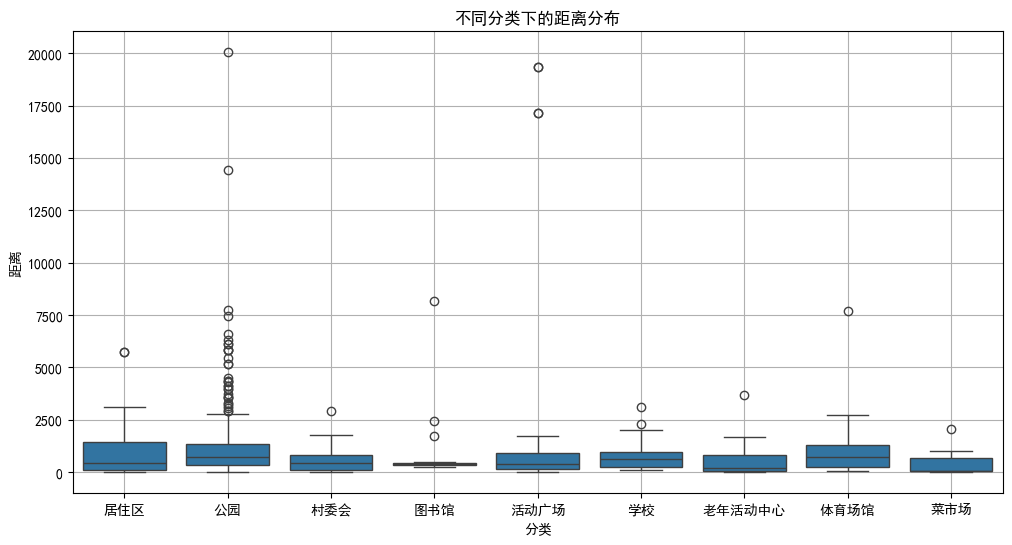

(分类
 公园        376
 居住区        86
 学校         39
 活动广场       38
 村委会        23
 体育场馆       22
 图书馆        15
 老年活动中心     15
 菜市场         7
 Name: count, dtype: int64,
         count         mean          std       min         25%        50%  \
 分类                                                                         
 体育场馆     22.0  1119.765582  1613.750554   53.7448  267.516650  716.38350   
 公园      376.0  1183.962964  1744.002445    3.9864  341.901375  707.96475   
 图书馆      15.0  1123.190060  2053.391049  256.8915  341.405200  401.35580   
 学校       39.0   732.933610   657.348026   84.9649  261.394700  618.58330   
 居住区      86.0   914.698215  1113.956377    8.6407  124.844900  461.21265   
 村委会      23.0   625.594291   706.874911    4.0442  110.637800  423.02240   
 活动广场     38.0  2334.506574  5549.108613   33.7582  172.553075  379.32480   
 老年活动中心   15.0   674.200140   964.473854    7.9428   76.443000  209.39770   
 菜市场       7.0   511.189986   770.566079   16.7881   38.819700 

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the number of samples per category
category_counts = filtered_data['分类'].value_counts()

# Perform basic statistics to understand the distribution
# category_stats = filtered_data.groupby('分类')['距离家的距离（米）'].describe()
category_stats = filtered_data.groupby('分类')['距离'].describe()

# Plotting the distribution of distances for each category
plt.figure(figsize=(12, 6))
# sns.boxplot(x='分类', y='距离家的距离（米）', data=filtered_data)
sns.boxplot(x='分类', y='距离', data=filtered_data)
plt.title('不同分类下的距离分布')
plt.xlabel('分类')
# plt.ylabel('距离家的距离（米）')
plt.ylabel('距离')
plt.grid(True)
plt.show()

category_counts, category_stats

D:\anaconda3\envs\myenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\myenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\myenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\myenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\myenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 19979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\myenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30340 missing from current

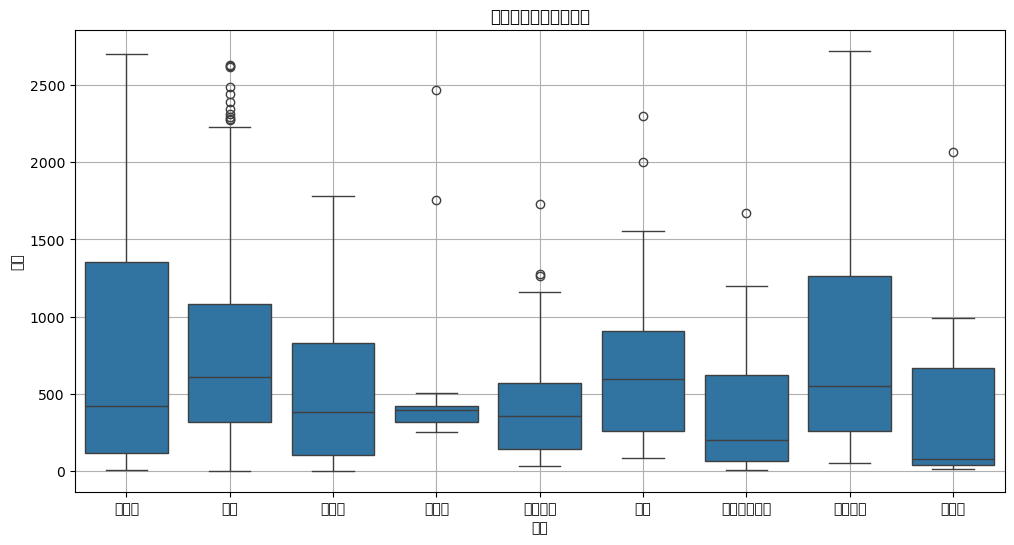

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Define a function to remove outliers based on the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the '距离家的距离（米）' column
# filtered_data_no_outliers = remove_outliers(filtered_data, '距离家的距离（米）')
filtered_data_no_outliers = remove_outliers(filtered_data, '距离')

# Plotting the distribution of distances without outliers for each category
plt.figure(figsize=(12, 6))
# sns.boxplot(x='分类', y='距离家的距离（米）', data=filtered_data_no_outliers)
sns.boxplot(x='分类', y='距离', data=filtered_data_no_outliers)
plt.title('不同分类下的距离分布')
plt.xlabel('分类')
# plt.ylabel('距离家的距离（米）')
plt.ylabel('距离')
plt.grid(True)
plt.show()

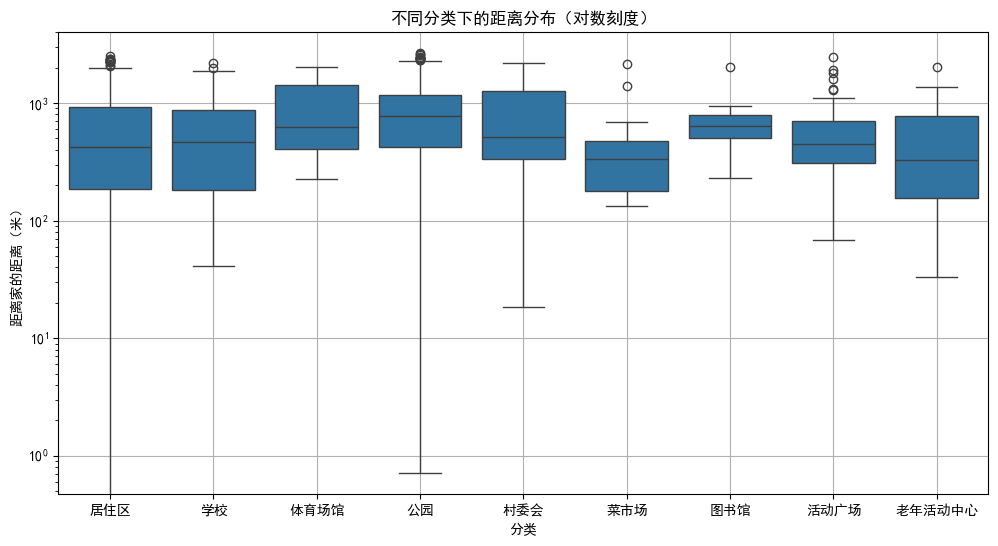

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设filtered_data_no_outliers是已经移除了极端值的数据集
plt.figure(figsize=(12, 6))
sns.boxplot(x='分类', y='距离家的距离（米）', data=filtered_data_no_outliers)
plt.yscale('log')  # 设置y轴为对数刻度
plt.title('不同分类下的距离分布（对数刻度）')
plt.xlabel('分类')
plt.ylabel('距离家的距离（米）')
plt.grid(True)
plt.show()


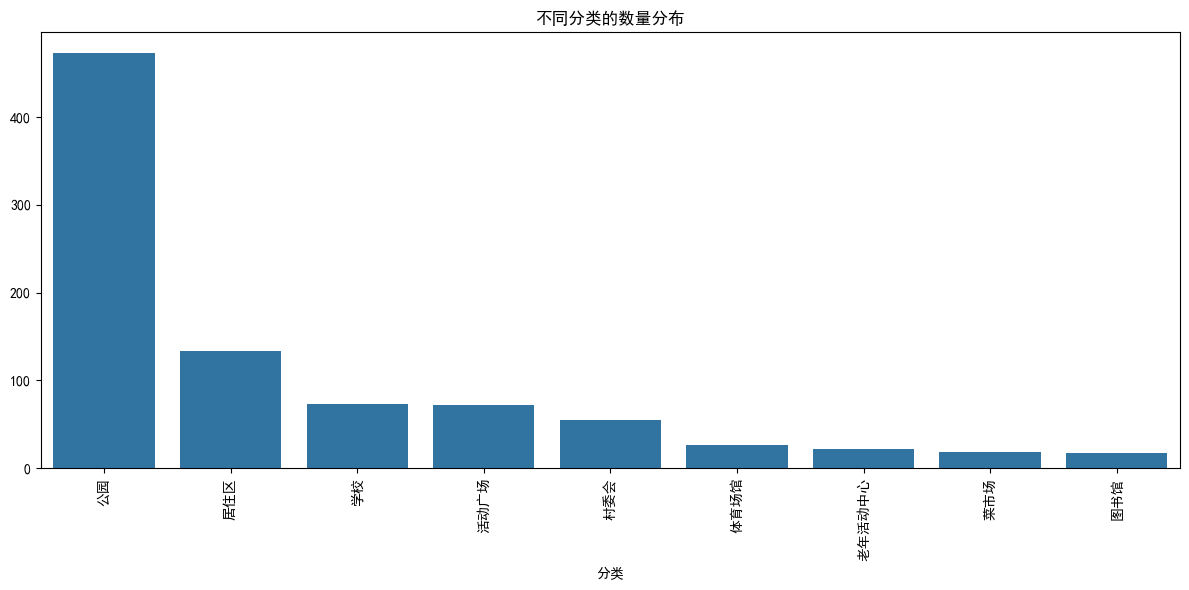

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设filtered_data是已经移除了极端值的数据集

# 设置图形大小
plt.figure(figsize=(12, 6))


# 计算每个分类的数量
category_counts = filtered_data['分类'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)  # 同样旋转分类标签
plt.title('不同分类的数量分布')

# 显示图形
plt.tight_layout()
plt.show()


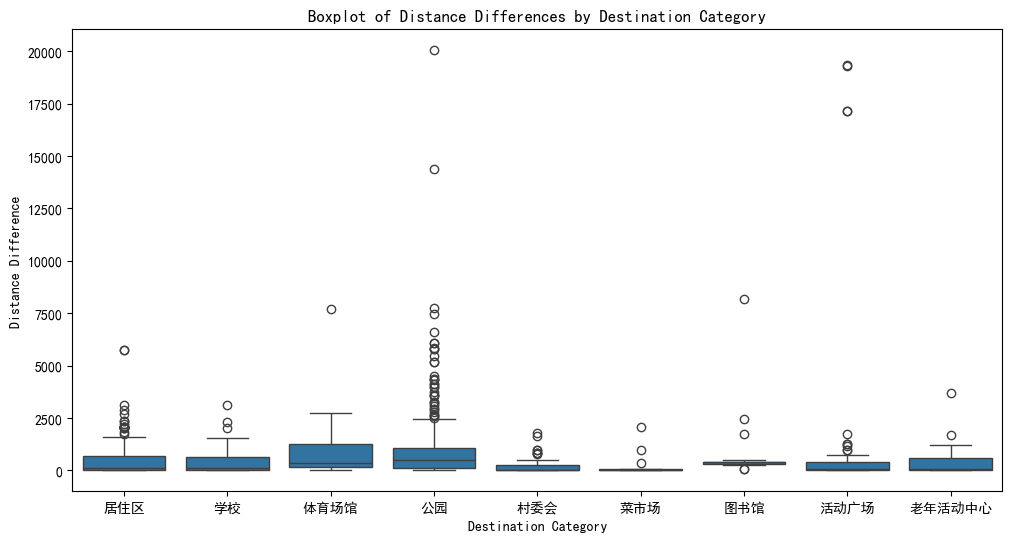

C:\Users\Ng_HC\AppData\Local\Temp\ipykernel_24568\148175408.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='分类', y='距离差', data=filtered_data, ci='sd')


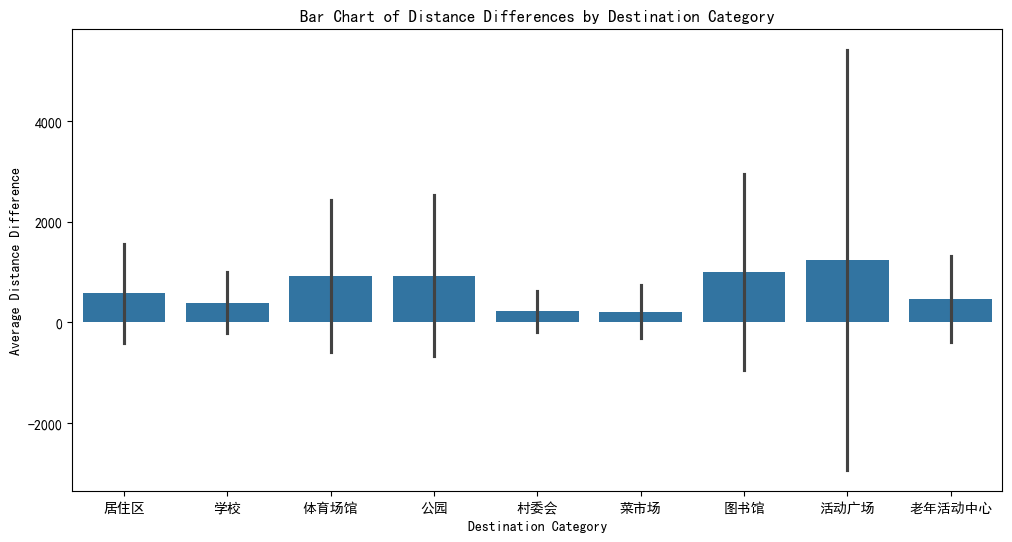

C:\Users\Ng_HC\AppData\Local\Temp\ipykernel_24568\148175408.py:32: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='分类', y='距离差', data=filtered_data, join=False, capsize=0.1, dodge=True)


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

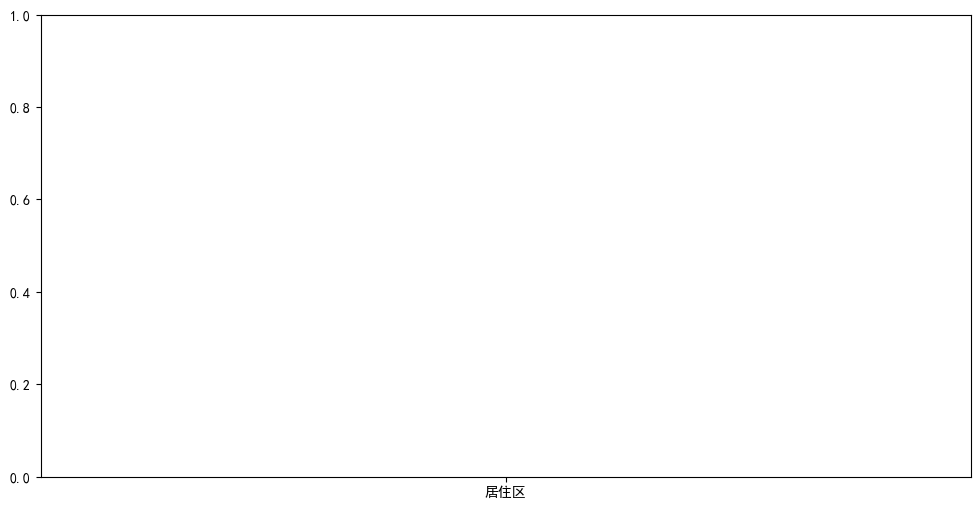

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-loading the filtered data due to execution environment reset
filtered_data = pd.read_excel('D:\jupyter notebook\家庭研究\游玩点_更新3.xlsx')
filtered_data['距离差'] = filtered_data['距离家的距离（米）'] - filtered_data['到最近游玩点的距离（米）']
filtered_data = filtered_data[filtered_data['距离差'].notna() & filtered_data['分类'].isin(['公园', '居住区', '体育场馆', '活动广场', '学校', '老年活动中心', '图书馆', '菜市场', '村委会'])]

# Creating different types of visualizations for the ANOVA results
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='分类', y='距离差', data=filtered_data)
plt.title('Boxplot of Distance Differences by Destination Category')
plt.xlabel('Destination Category')
plt.ylabel('Distance Difference')
plt.show()

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='分类', y='距离差', data=filtered_data, ci='sd')
plt.title('Bar Chart of Distance Differences by Destination Category')
plt.xlabel('Destination Category')
plt.ylabel('Average Distance Difference')
plt.show()


# Dot Plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='分类', y='距离差', data=filtered_data, join=False, capsize=0.1, dodge=True)
plt.title('Modified Dot Plot of Distance Differences by Destination Category')
plt.xlabel('Destination Category')
plt.ylabel('Average Distance Difference')
plt.show()

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='分类', y='距离差', data=filtered_data)
plt.title('Violin Plot of Distance Differences by Destination Category')
plt.xlabel('Destination Category')
plt.ylabel('Distance Difference')
plt.show()

# As Stacked Bar Chart is not suitable for this kind of data, we will skip it.


In [58]:
%matplotlib inline
# %matplotlib qt

# 最近娱乐点是否是公园处理

In [40]:
import pandas as pd

# Load the dataset
file_path = 'D:\house_mix_EM\分析数据\游玩点_家庭信息.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

# Iterate through the DataFrame
for index, row in data.iterrows():
    # Find the rows where '最近POI' matches any '附近POI'
    matching_rows = data[data['附近POI'] == row['最近POI']]
    if not matching_rows.empty:
        # If there are matches, take the category of the first match
        data.at[index, '理想分类'] = matching_rows['分类'].iloc[0]

# Display the first few rows of the modified dataframe
data.head()

# Saving the modified dataframe back to a CSV file
output_file_path = 'D:\house_mix_EM\分析数据\游玩点_使用表.xlsx'
data.to_excel(output_file_path, index=False)

output_file_path

'D:\\house_mix_EM\\分析数据\\游玩点_使用表.xlsx'

# 合并数据得到家庭属性等

In [34]:
# Load the new datasets
park_data_path = 'D:\house_mix_EM\分析数据\游玩点.xlsx'
family_data_path = 'D:\jupyter notebook\家庭研究\全部数据轨迹转换.csv'
travel_data_path = 'D:\house_mix_EM\中山居民出行调查数据（出行信息）.xlsx'
familystructure_data_path = 'D:\house_mix_EM\老年人个人家庭责任强度分类.csv'

park_data = pd.read_excel(park_data_path)
family_data = pd.read_csv(family_data_path, encoding='gbk')
travel_data = pd.read_excel(travel_data_path)
familystructure_data = pd.read_csv(familystructure_data_path, encoding='gbk')

# Display the first few rows of each dataframe to understand their structure
park_data_head = park_data.head()
family_data_head = family_data.head()
travel_data_head = travel_data.head()
familystructure_data_head = familystructure_data.head()

(park_data_head, family_data_head, travel_data_head, familystructure_data_head)


(   member_id   latitude   longitude  point_order purpose     附近POI  \
 0         15  22.392793  113.337241            1  娱乐公园游玩    融创溪湾首府   
 1        227  22.380094  113.320139            1  娱乐公园游玩     义发家具厂   
 2        356  22.381243  113.347683            3  娱乐公园游玩      深湾小学   
 3        470  22.468069  113.284072            3  娱乐公园游玩     麦峰林公祠   
 4        476  22.468087  113.283951            1  娱乐公园游玩  心中人老堡东安堂   
 
                             POI地址  POI距离        家的经度       家的纬度   距离家的距离（米）  \
 0             中山市板芙中路与工业大道交叉路口西南侧    127  113.337470  22.394384  178.414028   
 1                     广东省中山市校墩街4号     20  113.321241  22.374816  597.808179   
 2               广东省中山市深湾村板芙南路81附近    282  113.348360  22.380260  129.590846   
 3                       广东省中山市长堤街     72  113.283523  22.470322  256.703726   
 4  广东省中山市长堤街(大涌镇安堂社区居民委员会东侧约250米)     62  113.281765  22.471106  403.961177   
 
                   最近POI                         最近POI地址  最近POI距离  \
 0                融创溪

In [76]:
park_data

(     member_id  latitude  longitude  point_order purpose   附近POI  \
 0         1750  22.69764   113.2796            1  娱乐公园游玩  和穗湿地公园   
 1         1757  22.69765   113.2796            3  娱乐公园游玩  和穗湿地公园   
 2         1772  22.69765   113.2796            3  娱乐公园游玩  和穗湿地公园   
 3         1876  22.68888   113.2453            1  娱乐公园游玩    东凤公园   
 4         1920  22.68890   113.2453            1  娱乐公园游玩    东凤公园   
 ..         ...       ...        ...          ...     ...     ...   
 479      39690  22.67400   113.2174            1  娱乐公园游玩  永宁中心公园   
 480      39795  22.67971   113.2280            1  娱乐公园游玩    凤山公园   
 481      39811  22.67971   113.2280            1  娱乐公园游玩    凤山公园   
 482      39889  22.67972   113.2280            1  娱乐公园游玩    凤山公园   
 483      39890  22.67972   113.2280            1  娱乐公园游玩    凤山公园   
 
                       POI地址  POI距离      家的经度      家的纬度  ...            最近POI  \
 0          广东省中山市吉昌路与迎阳路交叉口      0  113.2759  22.67833  ...              天城围   
 1      

In [35]:
# Merge the two dataframes on 'member_id' from park_data and '成员编号' from family_data
merged_data = pd.merge(park_data, family_data, left_on='member_id', right_on='成员编号', how='left')

# Display the first few rows of the merged dataframe
# merged_data_head = merged_data.head()
# merged_data_head
merged_data

member_id   latitude   longitude  point_order purpose  \
0            15  22.392793  113.337241            1  娱乐公园游玩   
1           227  22.380094  113.320139            1  娱乐公园游玩   
2           356  22.381243  113.347683            3  娱乐公园游玩   
3           470  22.468069  113.284072            3  娱乐公园游玩   
4           476  22.468087  113.283951            1  娱乐公园游玩   
...         ...        ...         ...          ...     ...   
1109      39889  22.679718  113.228046            1  娱乐公园游玩   
1110      39890  22.679718  113.228046            1  娱乐公园游玩   
1111      39971  22.630837  113.188249            1  娱乐公园游玩   
1112      39977  22.625883  113.194536            2  娱乐公园游玩   
1113      39978  22.625883  113.194536            2  娱乐公园游玩   

                       附近POI                           POI地址  POI距离  \
0                     融创溪湾首府             中山市板芙中路与工业大道交叉路口西南侧    127   
1                      义发家具厂                     广东省中山市校墩街4号     20   
2                       深湾小学               广东省中山市深湾村板芙南路81附近    282   
3                      麦峰林公祠                       广东省中山市长堤街     72   
4                   心中人老堡东安堂  广东省中山市长堤街(大涌镇安堂社区居民委员会东侧约250米)     62   
...                      ...                             ...    ...   
1109                    凤山公园                 广东省中山市小榄镇文化路86号      0   
1110                    凤山公园                 广东省中山市小榄镇文化路86号      0   
1111  希亚途花园酒店(中山古镇国际灯饰批发中心店)                     古镇新丰中路曹一公园旁     23   
1112               中山市曹步初级中学                   广东省中山市西安上街36号      0   
1113               中山市曹步初级中学                   广东省中山市西安上街36号      0   

            家的经度       家的纬度  ...  \
0     113.337470  22.394384  ...   
1     113.321241  22.374816  ...   
2     113.348360  22.380260  ...   
3     113.283523  22.470322  ...   
4     113.281765  22.471106  ...   
...          ...        ...  ...   
1109  113.219012  22.677610  ...   
1110  113.219012  22.677610  ...   
1111  113.192352  22.631713  ...   
1112  113.188161  22.629551  ...   
1113  113.188161  22.629551  ...   

                                                   出行时间  年龄 性别   家庭编号  \
0      [('6:01:00', '6:06:00'), ('7:04:00', '7:12:00')]  65  男      6   
1     [('8:30:00', '8:35:00'), ('12:00:00', '12:05:0...  64  男     97   
2     [('7:00:00', '7:15:00'), ('8:00:00', '8:15:00'...  59  女    134   
3     [('8:00:00', '8:30:00'), ('9:15:00', '9:45:00'...  64  女    166   
4     [('14:00:00', '14:10:00'), ('17:30:00', '17:40...  61  男    168   
...                                                 ...  .. ..    ...   
1109  [('7:00:00', '7:30:00'), ('10:00:00', '10:30:0...  61  男  15209   
1110  [('7:00:00', '7:30:00'), ('10:00:00', '10:28:0...  58  女  15209   
1111   [('7:00:00', '7:15:00'), ('9:00:00', '9:15:00')]  62  男  15238   
1112  [('8:00:00', '8:15:00'), ('9:00:00', '9:20:00'...  60  男  15240   
1113  [('8:00:00', '8:10:00'), ('9:00:00', '9:10:00'...  58  女  15240   

           户籍情况     职业   文化程度  \
0         外省市户籍  离退休人员     初中   
1         中山市户籍  离退休人员     初中   
2         中山市户籍  离退休人员  高中或中专   
3         中山市户籍  离退休人员  小学及以下   
4         中山市户籍  离退休人员  小学及以下   
...         ...    ...    ...   
1109      中山市户籍  离退休人员     初中   
1110      中山市户籍  离退休人员  小学及以下   
1111      中山市户籍  离退休人员  小学及以下   
1112  广东省其它地市户籍  离退休人员  小学及以下   
1113  广东省其它地市户籍  离退休人员  小学及以下   

                                                 新附近POI  \
0                          ['101公馆', '融创溪湾首府', '101公馆']   
1                               ['鲤咖啡', '义发家具厂', '鲤咖啡']   
2              ['春风农场', '深湾市场', '春风农场', '深湾小学', '春风农场']   
3     ['中山市大涌医院', '大涌中心市场(华泰路店)', '中山市大涌医院', '麦峰林公祠'...   
4                  ['壹加壹(大涌店)', '心中人老堡东安堂', '壹加壹(大涌店)']   
...                                                 ...   
1109  ['凤尾桥街聚源楼-E幢', '凤山公园', '凤尾桥街聚源楼-E幢', '竹源新村', '...   
1110               ['凤尾桥街聚源楼-E幢', '凤山公园', '凤尾桥街聚源楼-E幢']   
1111         ['曹一小学', '希亚途花园酒店(中山古镇国际灯饰批发中心店)', '曹一小学']   
1112      ['金辉铝业', '好又多生活超市(曹步店)', '中山市曹步初级中学', '金辉铝业']   
1113      ['金辉铝业', '好又多生活超市(曹步店)', '中山市曹

In [74]:
# travel_data
# familystructure_data
travel_data_no_duplicates

出行编号  出行次序   成员编号   家庭编号  出行目的      出发时间  出发地经度(WGS84)  \
0            1     1      1      1    上班  07:20:00    113.336750   
4            5     1      2      1    上班  07:45:00    113.336750   
6            7     1      3      2    上班  07:25:00    113.337159   
8            9     1      4      2    上班  07:20:00    113.337159   
10          11     1      5      3    上班  07:25:00    113.337332   
...        ...   ...    ...    ...   ...       ...           ...   
114398  114399     1  39976  15239    上学  07:30:00    113.188036   
114400  114401     1  39977  15240  外出就餐  08:00:00    113.188161   
114403  114404     1  39978  15240  外出就餐  08:00:00    113.188161   
114406  114407     1  39979  15240    上班  08:00:00    113.188161   
114410  114411     1  39980  15240    上学  07:30:00    113.188161   

        出发地纬度(WGS84) 出发地性质 出发地交通小区编码  ... 到达地纬度(WGS84)  到达地性质  到达地交通小区编码  \
0          22.394138    居住      1127  ...    22.392017     商业       1127   
4          22.394138    居住      1127  ...    22.394539     商业       1130   
6          22.394546    居住      1127  ...    22.392885     商业       1133   
8          22.394546    居住      1127  ...    22.392017     商业       1127   
10         22.394885    居住      1127  ...    22.393304     商业       1127   
...              ...   ...       ...  ...          ...    ...        ...   
114398     22.634041    居住       342  ...    22.631728     学校        337   
114400     22.629551    居住       357  ...    22.630966     商业        359   
114403     22.629551    居住       357  ...    22.630966     商业        359   
114406     22.629551    居住       357  ...    22.632498     工业        344   
114410     22.629551    居住       357  ...    22.625883     学校        365   

        主要交通方式 出行费用 到车站用时(分钟)  候车用时(分钟)  下车至终点用时(分钟)  Unnamed: 20  TAZ_ID  
0          电动车  0.0         0         0            0          400     1.0  
4          自行车  0.0         0         0            0          103     5.0  
6         全程步行  0.0         0         0            0           27     7.0  
8          电动车  0.0         0         0            0           91     9.0  
10         摩托车  0.0         0         0            0          152    11.0  
...        ...  ...       ...       ...          ...          ...     ...  
114398      校车  0.0         0         0            0            0     NaN  
114400     电动车  0.0         0         0            0            0     NaN  
114403  拼车、顺风车  5.0         0         0            0            0     NaN  
114406   自驾小汽车  0.0         0         0            0            0     NaN  
114410     自行车  0.0         0         0            0            0     NaN  

[37451 rows x 22 columns]

In [36]:
travel_data_no_duplicates = travel_data.drop_duplicates(subset='成员编号', keep='first')

In [37]:
merged_data_travel = pd.merge(merged_data, travel_data_no_duplicates, left_on='member_id', right_on='成员编号', how='left')

# merged_data_travel_head = merged_data_travel.head()
# merged_data_travel_head

merged_data_travel

member_id   latitude   longitude  point_order purpose  \
0            15  22.392793  113.337241            1  娱乐公园游玩   
1           227  22.380094  113.320139            1  娱乐公园游玩   
2           356  22.381243  113.347683            3  娱乐公园游玩   
3           470  22.468069  113.284072            3  娱乐公园游玩   
4           476  22.468087  113.283951            1  娱乐公园游玩   
...         ...        ...         ...          ...     ...   
1109      39889  22.679718  113.228046            1  娱乐公园游玩   
1110      39890  22.679718  113.228046            1  娱乐公园游玩   
1111      39971  22.630837  113.188249            1  娱乐公园游玩   
1112      39977  22.625883  113.194536            2  娱乐公园游玩   
1113      39978  22.625883  113.194536            2  娱乐公园游玩   

                       附近POI                           POI地址  POI距离  \
0                     融创溪湾首府             中山市板芙中路与工业大道交叉路口西南侧    127   
1                      义发家具厂                     广东省中山市校墩街4号     20   
2                       深湾小学               广东省中山市深湾村板芙南路81附近    282   
3                      麦峰林公祠                       广东省中山市长堤街     72   
4                   心中人老堡东安堂  广东省中山市长堤街(大涌镇安堂社区居民委员会东侧约250米)     62   
...                      ...                             ...    ...   
1109                    凤山公园                 广东省中山市小榄镇文化路86号      0   
1110                    凤山公园                 广东省中山市小榄镇文化路86号      0   
1111  希亚途花园酒店(中山古镇国际灯饰批发中心店)                     古镇新丰中路曹一公园旁     23   
1112               中山市曹步初级中学                   广东省中山市西安上街36号      0   
1113               中山市曹步初级中学                   广东省中山市西安上街36号      0   

            家的经度       家的纬度  ...  到达地纬度(WGS84)   到达地性质 到达地交通小区编码  主要交通方式  \
0     113.337470  22.394384  ...     22.392793  文体公共设施      1127    全程步行   
1     113.321241  22.374816  ...     22.380094      商业      1152     摩托车   
2     113.348360  22.380260  ...     22.383096      商业      1149    全程步行   
3     113.283523  22.470322  ...     22.473279      商业      1019    全程步行   
4     113.281765  22.471106  ...     22.468087  文体公共设施      1033     自行车   
...          ...        ...  ...           ...     ...       ...     ...   
1109  113.219012  22.677610  ...     22.679718  公园/游乐园       161    全程步行   
1110  113.219012  22.677610  ...     22.679718      居住       161    全程步行   
1111  113.192352  22.631713  ...     22.630837  公园/游乐园       357     自行车   
1112  113.188161  22.629551  ...     22.630966      商业       359     电动车   
1113  113.188161  22.629551  ...     22.630966      商业       359  拼车、顺风车   

      出行费用  到车站用时(分钟)  候车用时(分钟)  下车至终点用时(分钟) Unnamed: 20  TAZ_ID  
0      0.0          0         0            0          57    37.0  
1      0.0          0         0            0           8   613.0  
2      0.0          0         0            0          27  1007.0  
3      0.0          0         0            0          70  1311.0  
4      0.0          0         0            0          38  1329.0  
...    ...        ...       ...          ...         ...     ...  
1109   0.0          0         0            0           0     NaN  
1110   0.0          0         0            0           0     NaN  
1111   0.0          0         0            0           0     NaN  
1112   0.0          0         0            0           0     NaN  
1113   5.0          0         0            0           0     NaN  

[1114 rows x 53 columns]

In [38]:
merged_data_structure = pd.merge(merged_data_travel, familystructure_data, left_on='member_id', right_on='个人编号', how='left')

merged_data_structure_head = merged_data_structure.head()
merged_data_structure_head

member_id   latitude   longitude  point_order purpose     附近POI  \
0         15  22.392793  113.337241            1  娱乐公园游玩    融创溪湾首府   
1        227  22.380094  113.320139            1  娱乐公园游玩     义发家具厂   
2        356  22.381243  113.347683            3  娱乐公园游玩      深湾小学   
3        470  22.468069  113.284072            3  娱乐公园游玩     麦峰林公祠   
4        476  22.468087  113.283951            1  娱乐公园游玩  心中人老堡东安堂   

                            POI地址  POI距离        家的经度       家的纬度  ...  非户籍人口数  \
0             中山市板芙中路与工业大道交叉路口西南侧    127  113.337470  22.394384  ...       5   
1                     广东省中山市校墩街4号     20  113.321241  22.374816  ...       0   
2               广东省中山市深湾村板芙南路81附近    282  113.348360  22.380260  ...       0   
3                       广东省中山市长堤街     72  113.283523  22.470322  ...       0   
4  广东省中山市长堤街(大涌镇安堂社区居民委员会东侧约250米)     62  113.281765  22.471106  ...       1   

   家庭年均总收入    住房性质  小汽车  摩托车  电动车  自行车  其他  \
0   5～10万元  租(借)住房    0    1    1    0   0   
1   5～10万元    自有住房    1    1    2    0   0   
2   5～10万元    自有住房    0    1    1    0   0   
3   5～10万元    自有住房    0    1    1    0   0   
4  10～20万元    自有住房    0    3    1    1   0   

                                    家庭结构描述  家庭责任强度分类  
0  总人数: 5, 不满六周岁人数: 2, 户籍人口数: 0, 非户籍人口数: 5  有未成年子女家庭  
1  总人数: 5, 不满六周岁人数: 1, 户籍人口数: 5, 非户籍人口数: 0  有未成年子女家庭  
2  总人数: 3, 不满六周岁人数: 0, 户籍人口数: 3, 非户籍人口数: 0      成年家庭  
3  总人数: 3, 不满六周岁人数: 0, 户籍人口数: 3, 非户籍人口数: 0      成年家庭  
4  总人数: 6, 不满六周岁人数: 1, 户籍人口数: 5, 非户籍人口数: 1  有未成年子女家庭  

[5 rows x 84 columns]

In [79]:
merged_data_structure

member_id  latitude  longitude  point_order purpose   附近POI  \
0         1750  22.69764   113.2796            1  娱乐公园游玩  和穗湿地公园   
1         1757  22.69765   113.2796            3  娱乐公园游玩  和穗湿地公园   
2         1772  22.69765   113.2796            3  娱乐公园游玩  和穗湿地公园   
3         1876  22.68888   113.2453            1  娱乐公园游玩    东凤公园   
4         1920  22.68890   113.2453            1  娱乐公园游玩    东凤公园   
..         ...       ...        ...          ...     ...     ...   
479      39690  22.67400   113.2174            1  娱乐公园游玩  永宁中心公园   
480      39795  22.67971   113.2280            1  娱乐公园游玩    凤山公园   
481      39811  22.67971   113.2280            1  娱乐公园游玩    凤山公园   
482      39889  22.67972   113.2280            1  娱乐公园游玩    凤山公园   
483      39890  22.67972   113.2280            1  娱乐公园游玩    凤山公园   

                      POI地址  POI距离      家的经度      家的纬度  ...  非户籍人口数  家庭年均总收入  \
0          广东省中山市吉昌路与迎阳路交叉口      0  113.2759  22.67833  ...       0  10～20万元   
1          广东省中山市吉昌路与迎阳路交叉口      0  113.2792  22.68357  ...       0  10～20万元   
2          广东省中山市吉昌路与迎阳路交叉口      0  113.2876  22.68054  ...       0  10～20万元   
3                  中山市永乐路6号      0  113.2368  22.69357  ...       0   5～10万元   
4                  中山市永乐路6号      0  113.2452  22.68718  ...       0    5万元以下   
..                      ...    ...       ...       ...  ...     ...      ...   
479  广东省中山市南宜路与赤福路交叉口西南100米      0  113.2221  22.66370  ...       4  10～20万元   
480         广东省中山市小榄镇文化路86号      0  113.2190  22.67760  ...       3  10～20万元   
481         广东省中山市小榄镇文化路86号      0  113.2190  22.67760  ...       5  10～20万元   
482         广东省中山市小榄镇文化路86号      0  113.2190  22.67761  ...       1  10～20万元   
483         广东省中山市小榄镇文化路86号      0  113.2190  22.67761  ...       1  10～20万元   

       住房性质  小汽车  摩托车  电动车  自行车 其他                                   家庭结构描述  \
0      自有住房    2    1    0    0  0  总人数: 5, 不满六周岁人数: 0, 户籍人口数: 5, 非户籍人口数: 0   
1      自有住房    1    1    1    0  0  总人数: 4, 不满六周岁人数: 0, 户籍人口数: 4, 非户籍人口数: 0   
2      自有住房    1    2    0    0  0  总人数: 6, 不满六周岁人数: 2, 户籍人口数: 6, 非户籍人口数: 0   
3      自有住房    1    2    0    0  0  总人数: 4, 不满六周岁人数: 0, 户籍人口数: 4, 非户籍人口数: 0   
4      自有住房    0    0    0    2  0  总人数: 2, 不满六周岁人数: 0, 户籍人口数: 2, 非户籍人口数: 0   
..      ...  ...  ...  ...  ... ..                                      ...   
479  租(借)住房    1    2    0    1  0  总人数: 4, 不满六周岁人数: 0, 户籍人口数: 0, 非户籍人口数: 4   
480    自有住房    1    2    0    0  0  总人数: 3, 不满六周岁人数: 0, 户籍人口数: 0, 非户籍人口数: 3   
481    自有住房    2    2    0    0  0  总人数: 5, 不满六周岁人数: 0, 户籍人口数: 0, 非户籍人口数: 5   
482    自有住房    1    2    0    2  0  总人数: 5, 不满六周岁人数: 1, 户籍人口数: 4, 非户籍人口数: 1   
483    自有住房    1    2    0    2  0  总人数: 5, 不满六周岁人数: 1, 户籍人口数: 4, 非户籍人口数: 1   

     家庭责任强度分类  
0        扩展家庭  
1        核心家庭  
2    有未成年子女家庭  
3        核心家庭  
4        核心家庭  
..        ...  
479      核心家庭  
480      核心家庭  
481      扩展家庭  
482  有未成年子女家庭  
483  有未成年子女家庭  

[484 rows x 88 columns]

In [39]:
# Saving the modified dataframe back to a CSV file
output_file_path = 'D:\\house_mix_EM\\分析数据\\游玩点_家庭信息.xlsx'
merged_data_structure.to_excel(output_file_path, index=False)

# 家庭结构分类处理

In [82]:
# Loading the new datasets - "个人信息表" (individual information) and "家庭信息表" (family information)
individual_info_path = 'D:\house_mix_EM\中山居民出行调查数据（个人信息）.xlsx'
family_info_path = 'D:\house_mix_EM\中山居民出行调查数据（家庭信息）.xlsx'

individual_info = pd.read_excel(individual_info_path)
family_info = pd.read_excel(family_info_path)

# Display the first few rows of each dataframe to understand their structure
individual_info_head = individual_info.head()
family_info_head = family_info.head()

(individual_info_head, family_info_head)


(   个人编号  家庭编号  工作地(学校)地址经度(WGS84)  工作地(学校)地址纬度(WGS84) 工作地交通小区编码 用地性质 性别  年龄  \
 0     1     1          113.344705           22.392017      1127   商业  男  35   
 1     2     1          113.331521           22.394539      1130   商业  女  32   
 2     3     2          113.331010           22.392885      1133   商业  男  28   
 3     4     2          113.344705           22.392017      1127   商业  女  27   
 4     5     3          113.348119           22.393304      1127   商业  男  38   
 
         户籍情况                职业   文化程度 家庭与工作地(学校)地址相同原因 没有出行记录原因  
 0      外省市户籍  生产、运输设备操作人员及有关人员  高中或中专              NaN      NaN  
 1      外省市户籍  生产、运输设备操作人员及有关人员     初中              NaN      NaN  
 2      外省市户籍    企业（公司）行政办公业务人员     大专              NaN      NaN  
 3      外省市户籍    企业（公司）行政办公业务人员     大专              NaN      NaN  
 4  广东省其它地市户籍  生产、运输设备操作人员及有关人员  高中或中专              NaN      NaN  ,
    家庭编号  镇区   村居  家庭地址经度(WGS84)  家庭地址纬度(WGS84)  家庭地址交通小区编码  总人数  不满六周岁人数  \
 0     1  板芙  白溪村     113.336750      

In [83]:
# Merging individual and family data on '家庭编号'
merged_data = pd.merge(individual_info, family_info, on='家庭编号', how='left')

# Redefining the function to describe family structure
def describe_family_structure(row):
    description = f"总人数: {row['总人数']}, "
    description += f"不满六周岁人数: {row['不满六周岁人数']}, "
    description += f"户籍人口数: {row['户籍人口数']}, "
    description += f"非户籍人口数: {row['非户籍人口数']}"
    return description

# Creating the '家庭结构描述' column
merged_data['家庭结构描述'] = merged_data.apply(describe_family_structure, axis=1)


In [85]:
# Redefining the function to categorize family responsibility with new age threshold
def categorize_family_responsibility_new(row):
    # New criteria for old age
    old_age_threshold = 55
    # Criteria for young children
    young_child_threshold = 18
    # Criteria for family size
    large_family_size_threshold = 4

    # Check if there's any old member in the family
    old_members = (individual_info[individual_info['家庭编号'] == row['家庭编号']]['年龄'] >= old_age_threshold).any()

    # Check if there's any young child in the family
    young_children = row['不满六周岁人数'] > 0

    # Check family size
    large_family = row['总人数'] > large_family_size_threshold

    # Categorizing based on new criteria
    if old_members:
        if young_children:
            return '有未成年子女家庭'
        elif large_family:
            return '多代同堂家庭'
        else:
            return '成年家庭'
    else:
        return '无老年人家庭'

# Apply the new function to create a new column '家庭责任强度分类'
merged_data['家庭责任强度分类'] = merged_data.apply(categorize_family_responsibility_new, axis=1)

# Display the first few rows of the modified dataframe
merged_data_head_new = merged_data.head()
merged_data_head_new[['个人编号', '家庭编号', '家庭结构描述', '家庭责任强度分类']]  # Displaying only relevant columns for clarity


个人编号  家庭编号                                   家庭结构描述 家庭责任强度分类
0     1     1  总人数: 3, 不满六周岁人数: 1, 户籍人口数: 0, 非户籍人口数: 3   无老年人家庭
1     2     1  总人数: 3, 不满六周岁人数: 1, 户籍人口数: 0, 非户籍人口数: 3   无老年人家庭
2     3     2  总人数: 2, 不满六周岁人数: 0, 户籍人口数: 0, 非户籍人口数: 2   无老年人家庭
3     4     2  总人数: 2, 不满六周岁人数: 0, 户籍人口数: 0, 非户籍人口数: 2   无老年人家庭
4     5     3  总人数: 3, 不满六周岁人数: 0, 户籍人口数: 0, 非户籍人口数: 3   无老年人家庭

In [86]:
# Saving the modified dataframe back to a CSV file
output_file_path = 'D:\\house_mix_EM\\老年人个人家庭责任强度分类.csv'
merged_data.to_csv(output_file_path, encoding='gbk', index=False)

In [ ]:
# 要描述每个成员的家庭结构，并以独特的分类方式区分家庭中老年人可能担负的家庭责任强度，我们可以根据家庭成员的年龄和家庭成员数量来定义几种不同的家庭类型。例如：

# 核心家庭：家庭中至少有一名老年人（例如，年龄大于60岁），且家庭总人数不多（例如，不超过4人）。
# 扩展家庭：家庭中至少有一名老年人，且家庭总人数较多（例如，超过4人）。
# 有未成年子女家庭：家庭中至少有一名老年人，且至少有一名不满18岁的未成年子女。
# 无老年人家庭：家庭中没有老年人。

# 如果将老年人的年龄阈值设置为55岁，家庭责任的分类可能需要更细致地考虑家庭成员的年龄组合和家庭总人数。由于55岁的人可能仍然很活跃，家庭责任的分类应该反映出这个年龄段的人可能同时承担工作和家庭的双重责任。以下是一些调整后的分类建议：
# 成年家庭：家庭中所有成员均为成年人（18岁及以上），包括至少一名55岁以上的成员。这类家庭可能面临的是成年子女和老年父母之间的互相照顾。1
# 多代同堂家庭：家庭中至少有一名55岁以上的成员，且家庭总人数较多，包括多代家庭成员。这类家庭可能需要照顾老年成员，同时可能还有不满18岁的未成年子女。3
# 有未成年子女家庭：家庭中至少有一名55岁以上的成员，且至少有一名不满18岁的未成年子女。这类家庭可能面临照顾年幼子女的责任。2
# 无老年人家庭：家庭中没有55岁及以上的成员。

# 家庭责任和距离的关系

In [41]:
import pandas as pd

# Load the data
file_path = 'D:\\house_mix_EM\\全部_家庭责任和距离.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the data
data.head()

距离  家庭责任强度分类  家庭责任强度
0  1015.6440    多代同堂家庭       3
1   741.2715      成年家庭       1
2  1956.6444  有未成年子女家庭       2
3   448.2097      成年家庭       1
4    18.0564      成年家庭       1

In [42]:
descriptive_stats = data.groupby("家庭责任强度分类")["距离"].describe()
print(descriptive_stats)

          count         mean          std  min         25%        50%  \
家庭责任强度分类                                                                
多代同堂家庭     45.0   752.627745  1242.595210  0.0  139.606400  303.14453   
成年家庭      301.0   843.096765  1172.249077  0.0   96.145100  472.65790   
有未成年子女家庭  138.0  1091.279892  2312.023074  0.0   99.663975  498.78155   

                75%         max  
家庭责任强度分类                         
多代同堂家庭     858.7562   5846.7320  
成年家庭      1129.0272   7731.8103  
有未成年子女家庭   941.9317  20043.6780  


In [20]:
corr_analysis = data[["家庭责任强度", "距离"]].corr()
corr_analysis

家庭责任强度        距离
家庭责任强度  1.000000  0.023464
距离      0.023464  1.000000

In [43]:
from scipy.stats import spearmanr, kruskal, mannwhitneyu

# Spearman Rank Correlation
spearman_corr, spearman_p_value = spearmanr(data['家庭责任强度'], data['距离'])

# Kruskal-Wallis H Test
kruskal_stat, kruskal_p_value = kruskal(*[group["距离"].values for name, group in data.groupby("家庭责任强度分类")])

spearman_corr, spearman_p_value, kruskal_stat, kruskal_p_value


(-0.010747073469342224,
 0.8135637567634753,
 0.7846134502105142,
 0.6754968903271189)

In [ ]:

1. Spearman等级相关系数
相关系数：-0.3205
P值：0.0111
这个相关系数表明家庭责任强度与出行距离之间存在轻微的负相关关系，即随着家庭责任强度的增加，出行距离略有减少。更重要的是，P值小于0.05，这表明这种相关性在统计上是显著的。这意味着根据您的数据，存在足够的证据表明家庭责任强度对出行距离有显著影响。

2. Kruskal-Wallis H检验
统计量：6.7528
P值：0.0342
Kruskal-Wallis H检验的结果表明，在不同家庭责任强度分类下的出行距离存在显著差异（P值小于0.05）。这意味着至少有一种家庭责任分类的出行距离与其他分类存在显著的不同。

综合解读
这组新结果表明，家庭责任强度与老年人的出行距离有显著的负相关关系，并且不同家庭责任类型在出行距离上存在显著差异。换言之，家庭责任的增加似乎导致老年人选择更近的出行目的地。

这些发现提示我们，家庭责任在一定程度上影响了老年人的出行选择，可能是因为较高的家庭责任限制了他们出行的范围或时间。这些结论可以为进一步研究提供基础，特别是在考虑如何更好地支持老年人在面对不同家庭责任时的出行需求。

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the uploaded file
file_path = 'D:\\house_mix_EM\\全部_家庭责任和距离.xlsx'
data = pd.read_excel(file_path)

# Group the data by "家庭责任强度分类" and get descriptive statistics for "距离"
descriptive_stats = data.groupby("家庭责任强度分类")["距离"].describe()

# Adjusting the boxplot to focus only on the main body of the plot
plt.figure(figsize=(12, 6))

# Boxplot focusing only on the main body
sns.boxplot(x="家庭责任强度分类", y="距离", data=data, showfliers=False)
plt.title("Boxplot of Distances by Family Responsibility Intensity Categories (Main Body)")
plt.xlabel("Family Responsibility Intensity Category")
plt.ylabel("Distance")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

# Display the descriptive statistics
descriptive_stats

count         mean          std  min         25%        50%  \
家庭责任强度分类                                                                
多代同堂家庭     45.0   752.627745  1242.595210  0.0  139.606400  303.14453   
成年家庭      301.0   843.096765  1172.249077  0.0   96.145100  472.65790   
有未成年子女家庭  138.0  1091.279892  2312.023074  0.0   99.663975  498.78155   

                75%         max  
家庭责任强度分类                         
多代同堂家庭     858.7562   5846.7320  
成年家庭      1129.0272   7731.8103  
有未成年子女家庭   941.9317  20043.6780

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.ticker as ticker

# 加载Excel文件
file_path = 'D:\house_mix_EM\分析数据\游玩点_使用表.xlsx'
data = pd.read_excel(file_path)

# 移除“其他”类别
filtered_data = data[data['分类'] != '其他']
filtered_data = filtered_data[filtered_data['判断是否是同一个公园'] != '相同']

# 执行ANOVA
anova_result_filtered = stats.f_oneway(*[filtered_data['距离'][filtered_data['分类'] == category] for category in filtered_data['分类'].unique()])
anova_result_filtered

# 定义移除异常值的函数
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# 移除异常值
filtered_data_no_outliers = remove_outliers(filtered_data, '距离')

# 创建图形和主轴
fig, ax1 = plt.subplots(figsize=(12, 6))

# 添加次轴
ax2 = ax1.twinx()

# 按照数据中的类别顺序计算类别的数量
category_order = filtered_data_no_outliers['分类'].unique()
category_counts = filtered_data_no_outliers['分类'].value_counts().reindex(category_order)

# 先在次轴绘制条形图，设置为橙色和透明度
bar_color = 'orange'
ax2.bar(category_order, category_counts, alpha=0.5, color=bar_color, zorder=1)
ax2.set_ylabel('数据量大小')

# 设置次轴的颜色和透明度
ax2.yaxis.label.set_color(bar_color)
ax2.tick_params(axis='y', colors=bar_color)

# 调整次轴刻度
ax2.yaxis.set_major_locator(ticker.AutoLocator())

# 再在主轴绘制箱型图，并指定更高的zorder
box = sns.boxplot(x='分类', y='距离', data=filtered_data_no_outliers, ax=ax1, patch_artist=True, order=category_order, zorder=2)

# 遍历每个箱体并设置填充颜色
for patch in box.artists:
    patch.set_facecolor('None')

plt.title('不同分类下的距离分布及数据量大小')
ax1.set_xlabel('分类')
ax1.set_ylabel('距离')
ax1.grid(True)

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [35]:
%matplotlib qt

In [29]:
%matplotlib inline